In [125]:
import pandas as pd
import numpy as np

# Basic EDA

In [126]:
fraud = pd.read_csv('aggregated_policy_nolabel_2025.csv')
fraud.head()

GivenName MiddleInitial  Surname          StreetAddress           City  \
0     James             M    Baker      1782 Freedom Lane        Atwater   
1   Melanie             C  Johnson    3230 Gateway Avenue      Lancaster   
2      Anne             T   Bailey      1011 Maple Street        Anaheim   
3  Geoffrey             E    Veiga  2370 Roosevelt Street  San Francisco   
4    Sylvia             W    Hines    4404 Lindale Avenue        Oakland   

  State  ZipCode Country TelephoneNumber MothersMaiden  ...  \
0    CA    95301      US    209-356-7271      McDonald  ...   
1    CA    93534      US    661-945-1609       Johnson  ...   
2    CA    92801      US    714-330-5620        Lehoux  ...   
3    CA    94103      US    415-436-5690       Johnson  ...   
4    CA    94607      US    510-551-8237      Woodward  ...   

  Diff_Cust_Inc_CZIPInc Avg_CH_CovLimit  IN_LessThan_60 Ratio_AdjZIP_PopZIP  \
0                 12897             0.0               0         0.001105926   
1                 12108             0.0               0         0.001855571   
2                -12715             0.0               0         0.000982793   
3                 25636             0.0               0         0.001729849   
4                 72144             0.0               0         0.002562255   

  Num_Adj_CustID Zip_per_CustID  Avg_CL PerSize_Max_CH  SD_CovLim_Last_6mon  \
0              1              1   50000            0.0                  0.0   
1              1              1  100000            0.0                  0.0   
2              1              1  100000            0.0                  0.0   
3              1              1   50000            0.0                  0.0   
4              1              1  150000            0.0                  0.0   

   Time_MaritalCH_CL  
0                NaN  
1                NaN  
2                0.0  
3                NaN  
4                NaN  

[5 rows x 120 columns]

In [127]:
one_value_col = fraud.columns[fraud.nunique() == 1]

fraud = fraud.drop(one_value_col, axis=1)

In [128]:
missing_columns = fraud.columns[fraud.isnull().sum() > 0].tolist()

display(fraud[missing_columns].isnull().sum())

display(fraud[missing_columns].dtypes)

display(fraud[missing_columns].describe())


Adj_ZIP                    112
Distance_Claim_Adj        6429
Time_LastChange_Claim    23311
Marriage                 37858
Pop_CZIP                  1805
MedInc_CZIP               2214
Time_MaritalCH_CL        43729
dtype: int64

Adj_ZIP                   object
Distance_Claim_Adj       float64
Time_LastChange_Claim    float64
Marriage                  object
Pop_CZIP                 float64
MedInc_CZIP              float64
Time_MaritalCH_CL        float64
dtype: object

Distance_Claim_Adj  Time_LastChange_Claim       Pop_CZIP  \
count        38059.000000           21177.000000   42683.000000   
mean           179.692719               3.864995   29298.226413   
std            258.466267               2.632143   19612.477682   
min              0.000000               0.000000       7.000000   
25%             25.200000               1.000000   14389.000000   
50%            109.100000               3.000000   26599.000000   
75%            333.300000               6.000000   40521.000000   
max           5091.200000               9.000000  105549.000000   

         MedInc_CZIP  Time_MaritalCH_CL  
count   42274.000000         759.000000  
mean    54408.677201           1.931489  
std     26366.097671           2.766755  
min     10469.000000           0.000000  
25%     35427.000000           0.000000  
50%     49233.000000           0.000000  
75%     69076.000000           3.000000  
max    165534.000000           9.000000

In [129]:
fraud['Adj_ZIP'].value_counts().head(20)

# Create flag for text zip code 
fraud['Text_ZIP_flag'] = fraud['Adj_ZIP'].apply(
    lambda x: isinstance(x, str) and not x.isnumeric() if pd.notna(x) else False
).astype(int)

# Create missing category
fraud['Adj_ZIP'] = np.where(fraud['Adj_ZIP'].isna(), "Missing", fraud['Adj_ZIP'])



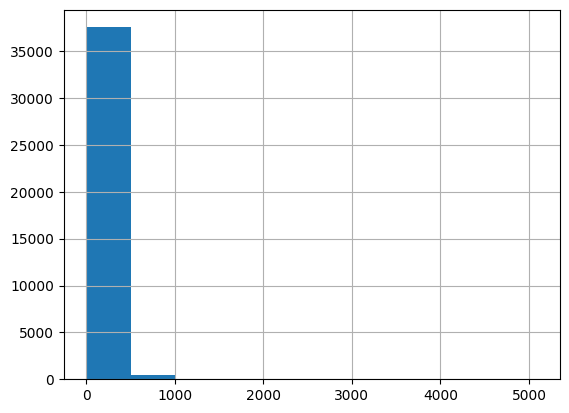

In [130]:
fraud['Distance_Claim_Adj'].hist();

# Create missing flag
fraud['Distance_Claim_Adj_missing'] = fraud['Distance_Claim_Adj'].isnull().astype(int)

# Impute with median
median_value = fraud['Distance_Claim_Adj'].median()

fraud['Distance_Claim_Adj'] = fraud['Distance_Claim_Adj'].fillna(median_value)

In [131]:
# TODO: Come back to this
fraud['Time_LastChange_Claim'].value_counts()



Time_LastChange_Claim
1.0    5670
2.0    2840
3.0    2329
4.0    2057
5.0    1957
6.0    1781
7.0    1614
8.0    1451
9.0    1323
0.0     155
Name: count, dtype: int64

In [132]:
display(fraud['Marriage'].value_counts())

# Create U for unknown
fraud['Marriage'] = np.where(fraud['Marriage'].isna(), "U", fraud['Marriage'])


Marriage
M    3703
S    1910
W    1017
Name: count, dtype: int64

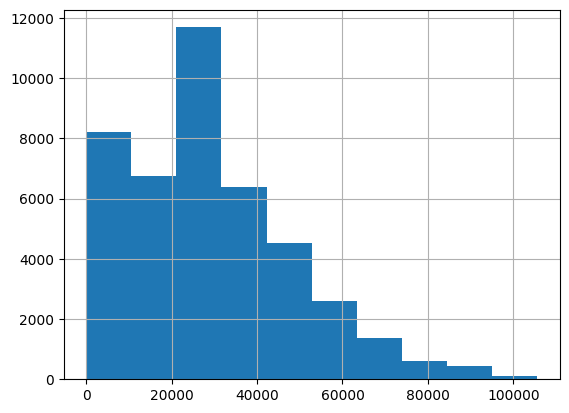

In [133]:
fraud['Pop_CZIP'].hist();

# Create missing flag
fraud['Pop_CZIP_missing'] = fraud['Pop_CZIP'].isnull().astype(int)

# Impute with median
median_value = fraud['Pop_CZIP'].median()

fraud['Pop_CZIP'] = fraud['Pop_CZIP'].fillna(median_value)

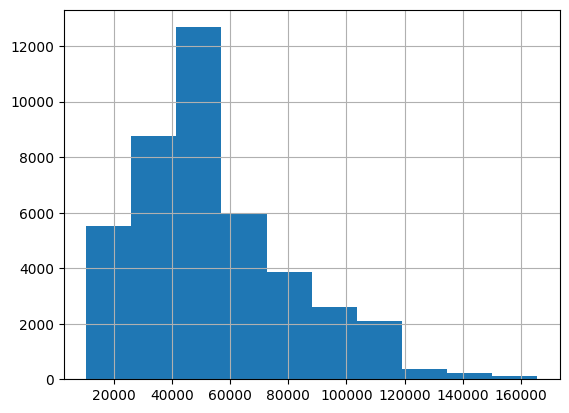

In [134]:
fraud['MedInc_CZIP'].hist();

# Create missing flag
fraud['MedInc_CZIP_missing'] = fraud['MedInc_CZIP'].isnull().astype(int)

# Impute with median
median_value = fraud['MedInc_CZIP'].median()

fraud['MedInc_CZIP'] = fraud['MedInc_CZIP'].fillna(median_value)

In [135]:
# Drop due to high missing 
fraud = fraud.drop('Time_MaritalCH_CL',axis=1)

In [136]:
fraud.columns[fraud.isnull().sum() > 0].tolist()
# Temp drop until figure this out
fraud = fraud.drop('Time_LastChange_Claim',axis=1)

## Multiple Dimensions

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=834695


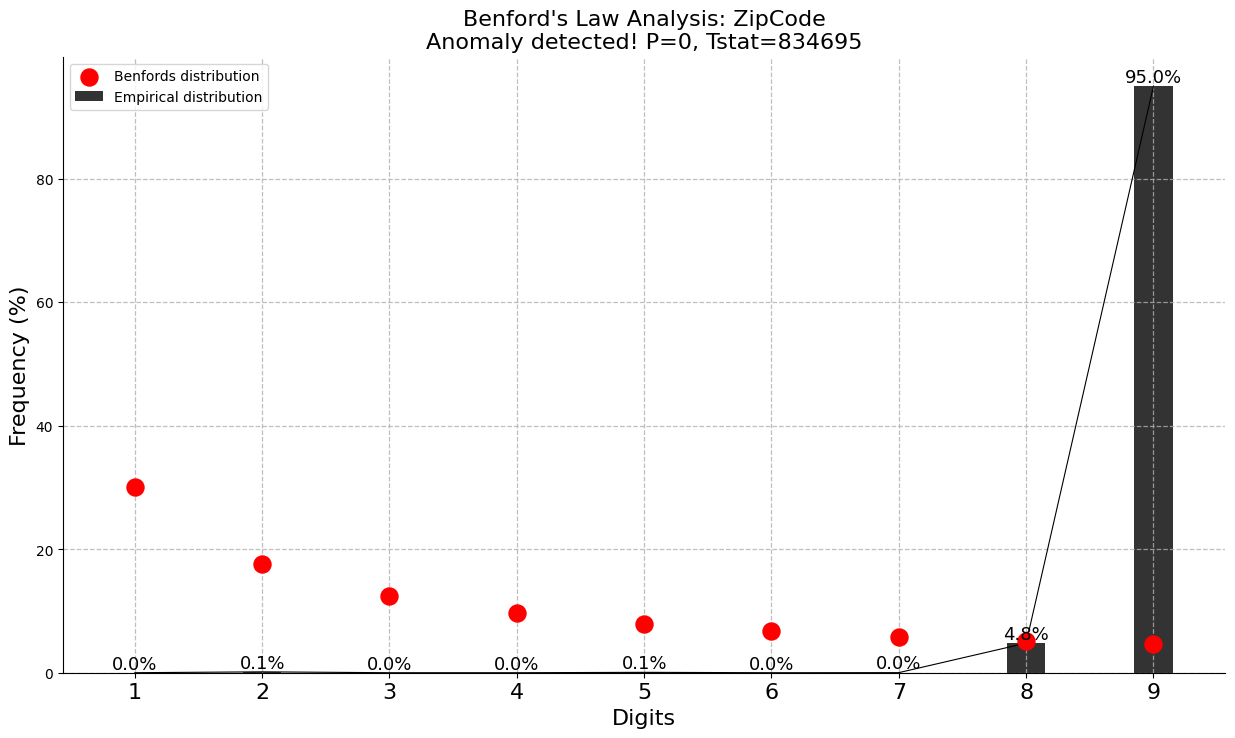

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=51423.1


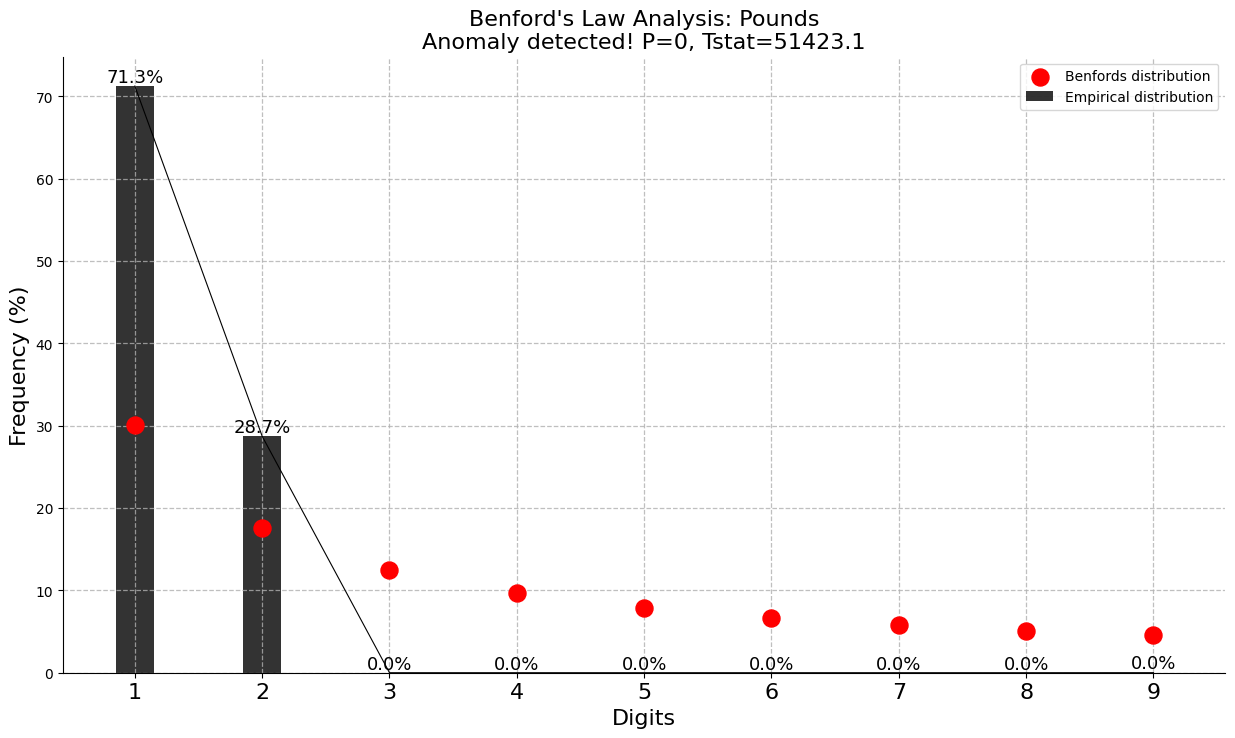

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=24168


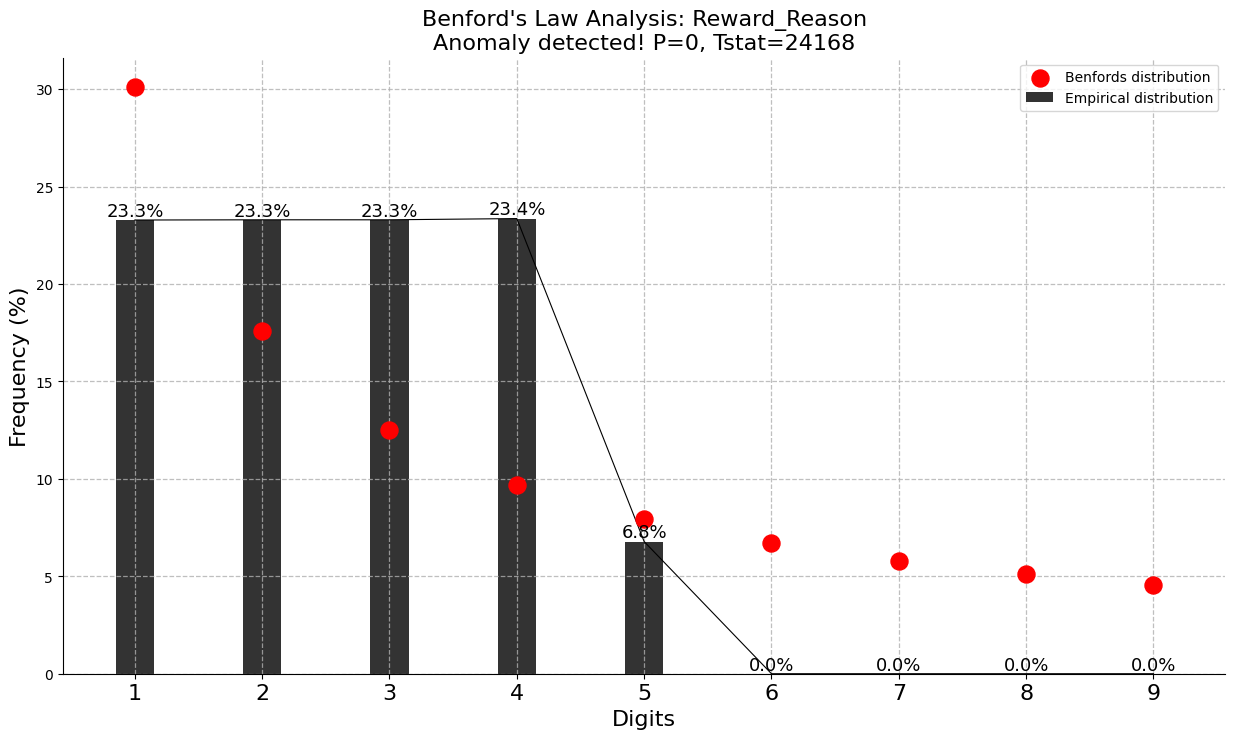

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=13508.9


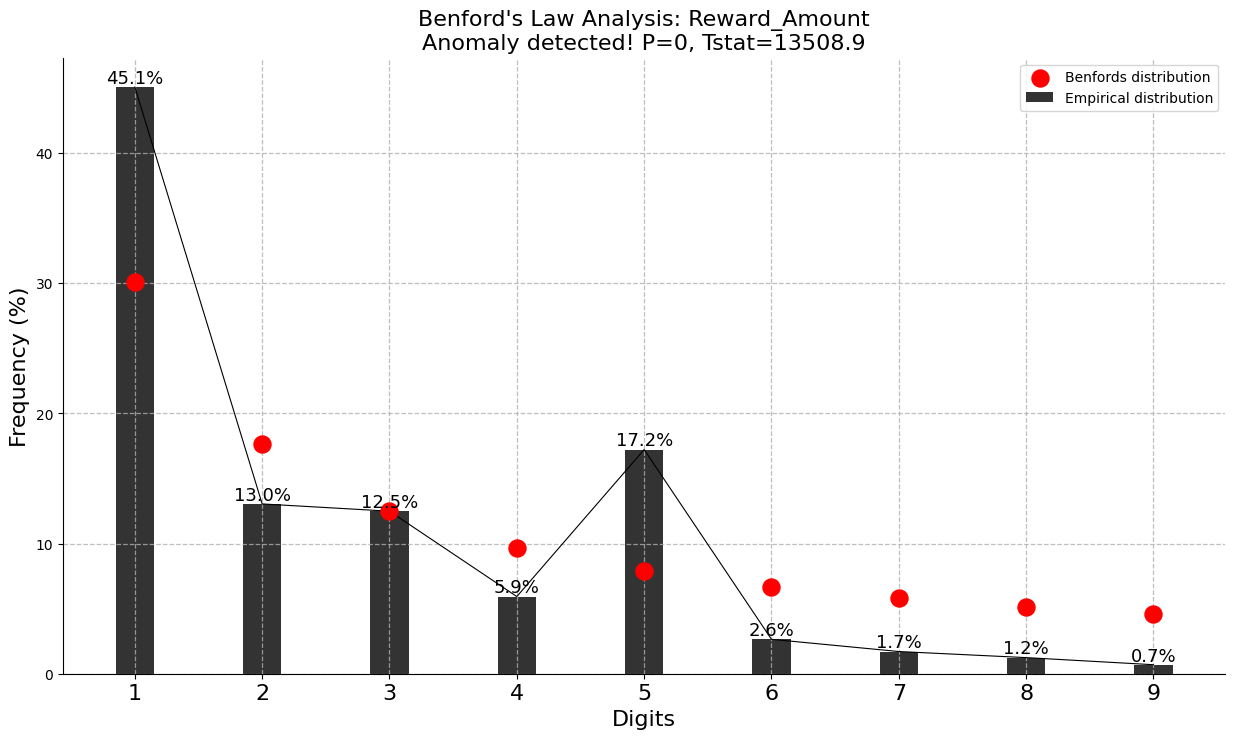

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=8929.62


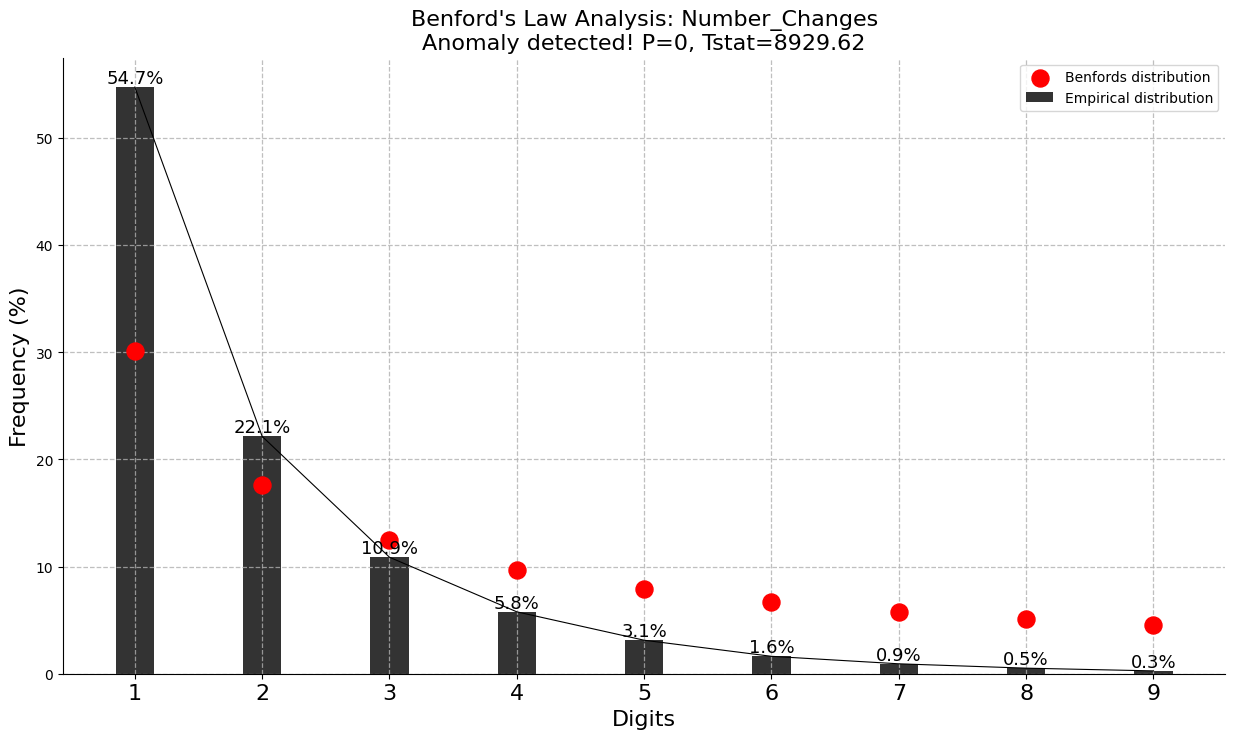

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=14403.2


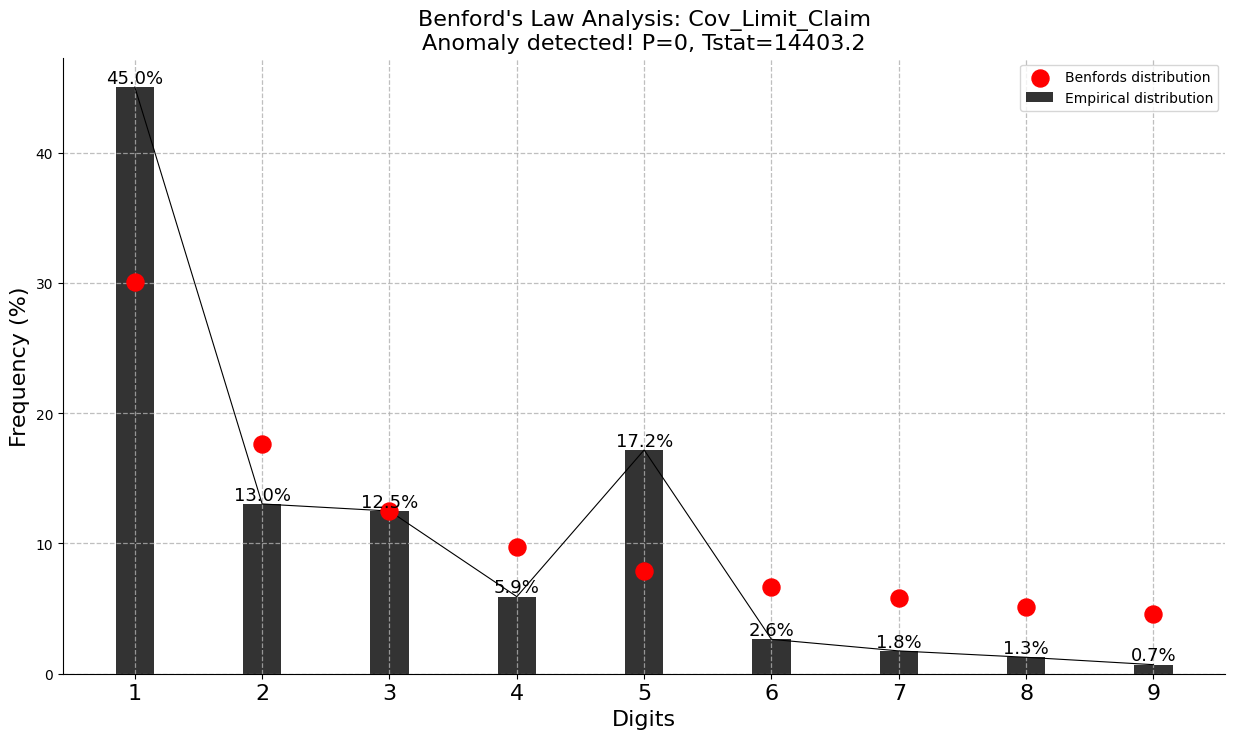

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=14316


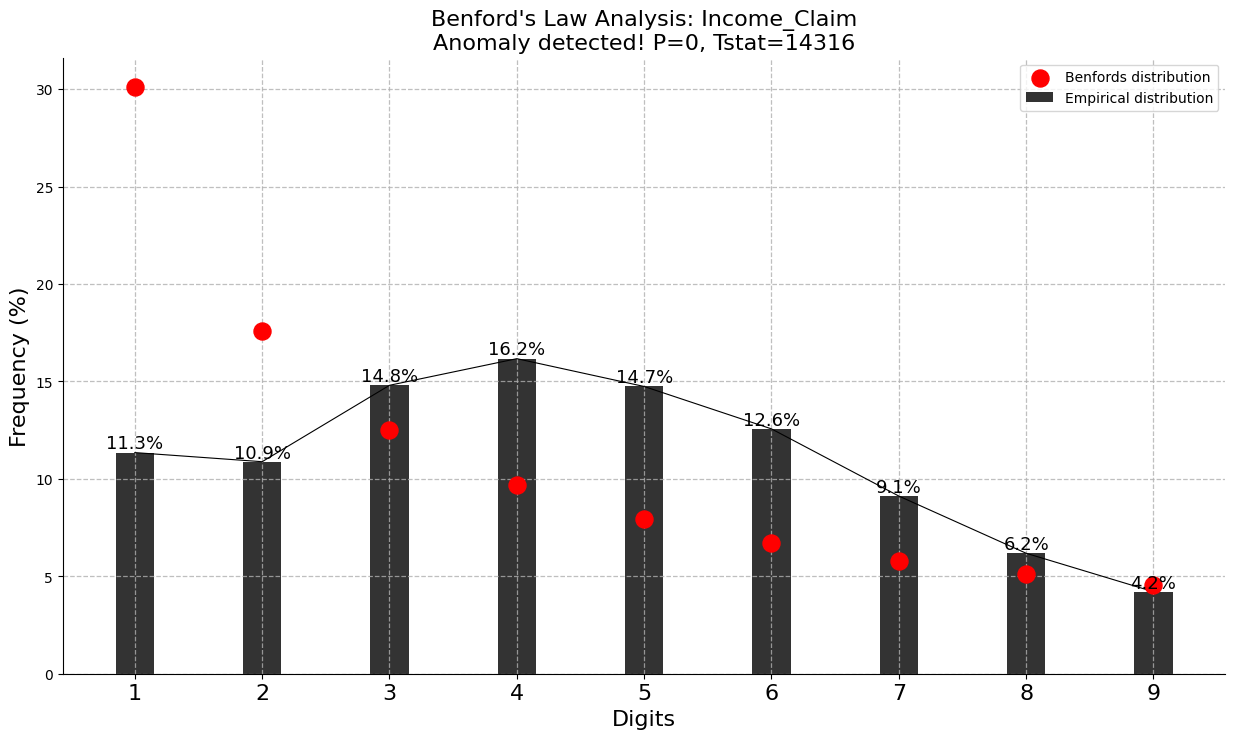

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >No data available for this position.


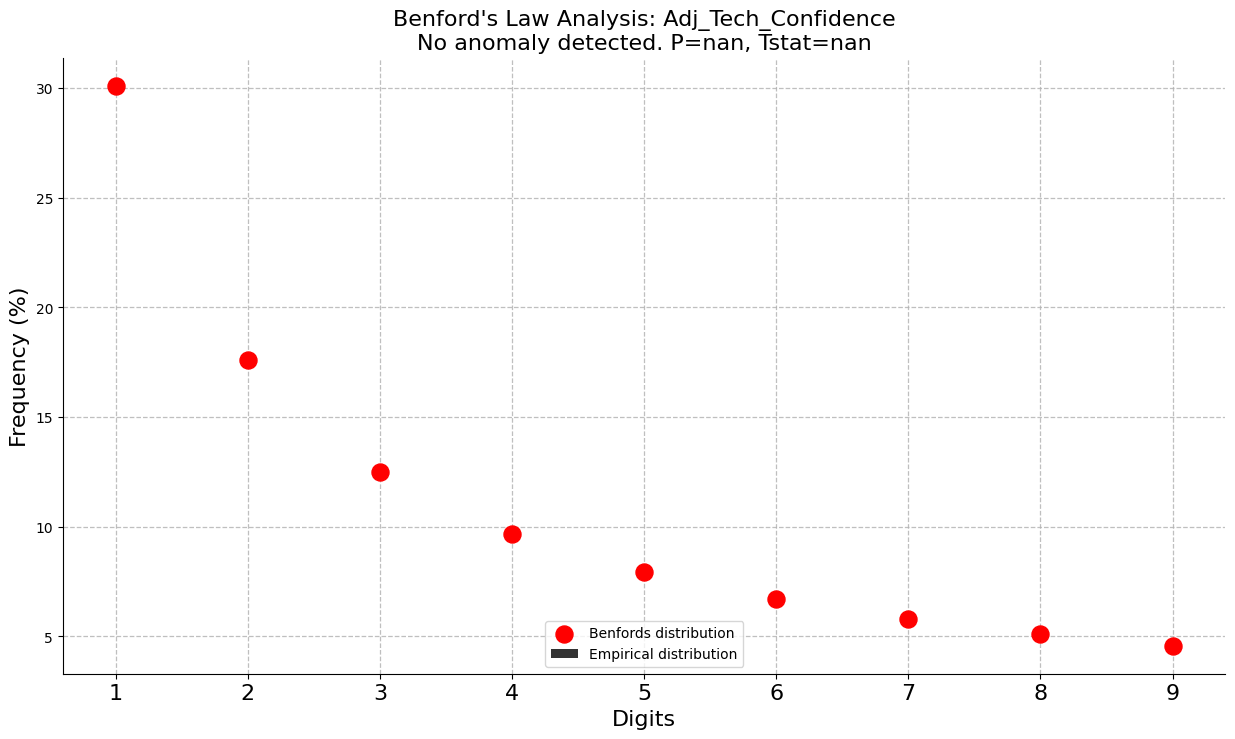

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=1.66249e-60, Tstat=301.851


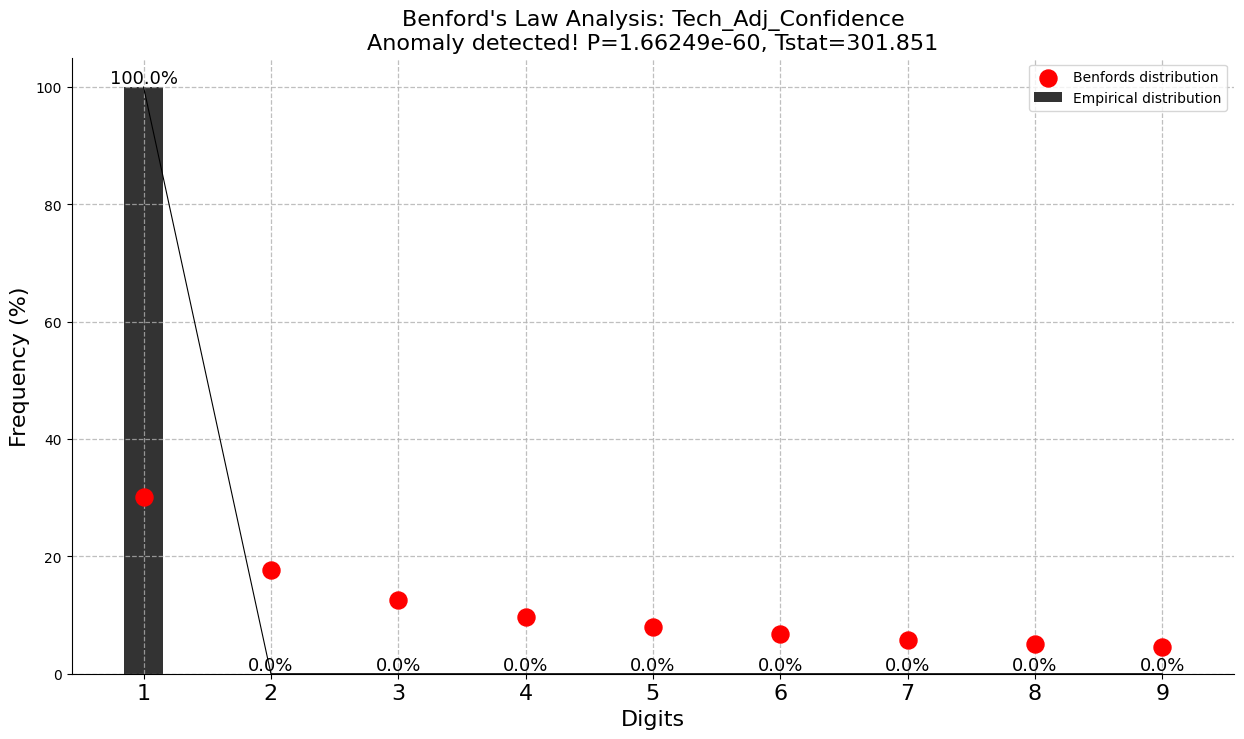

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=3561.47


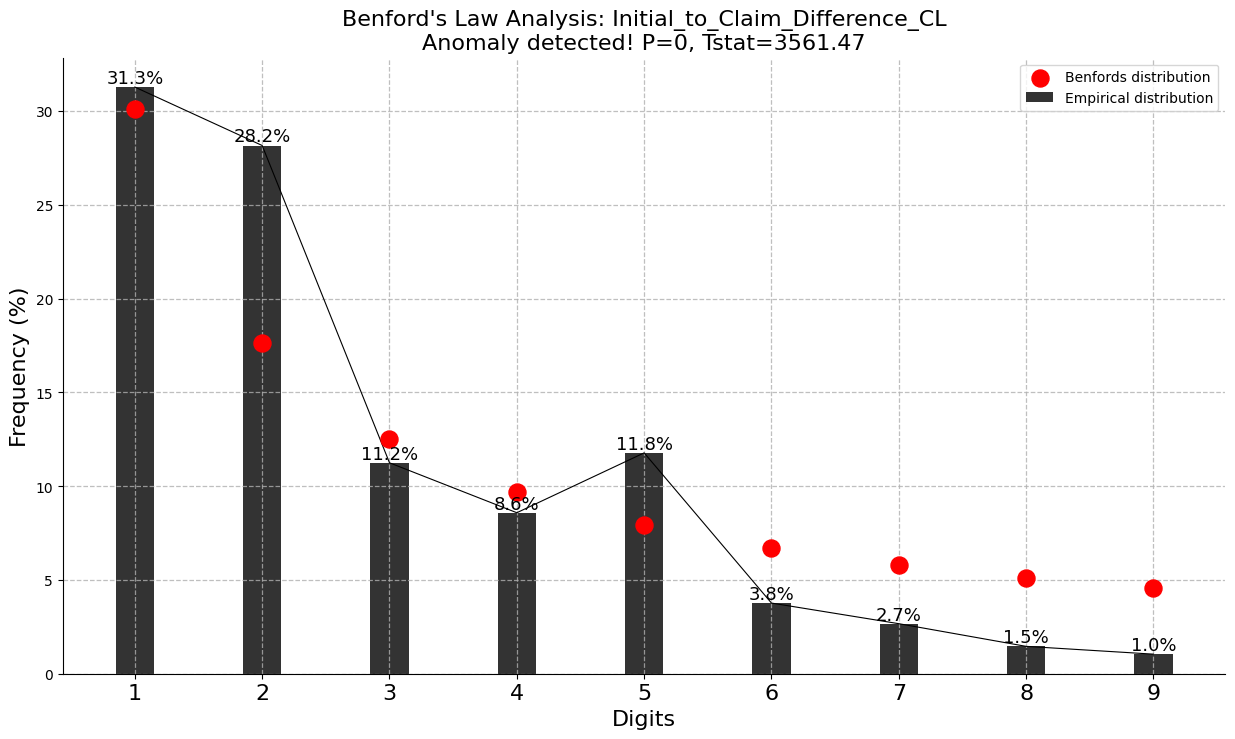

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=7533.52


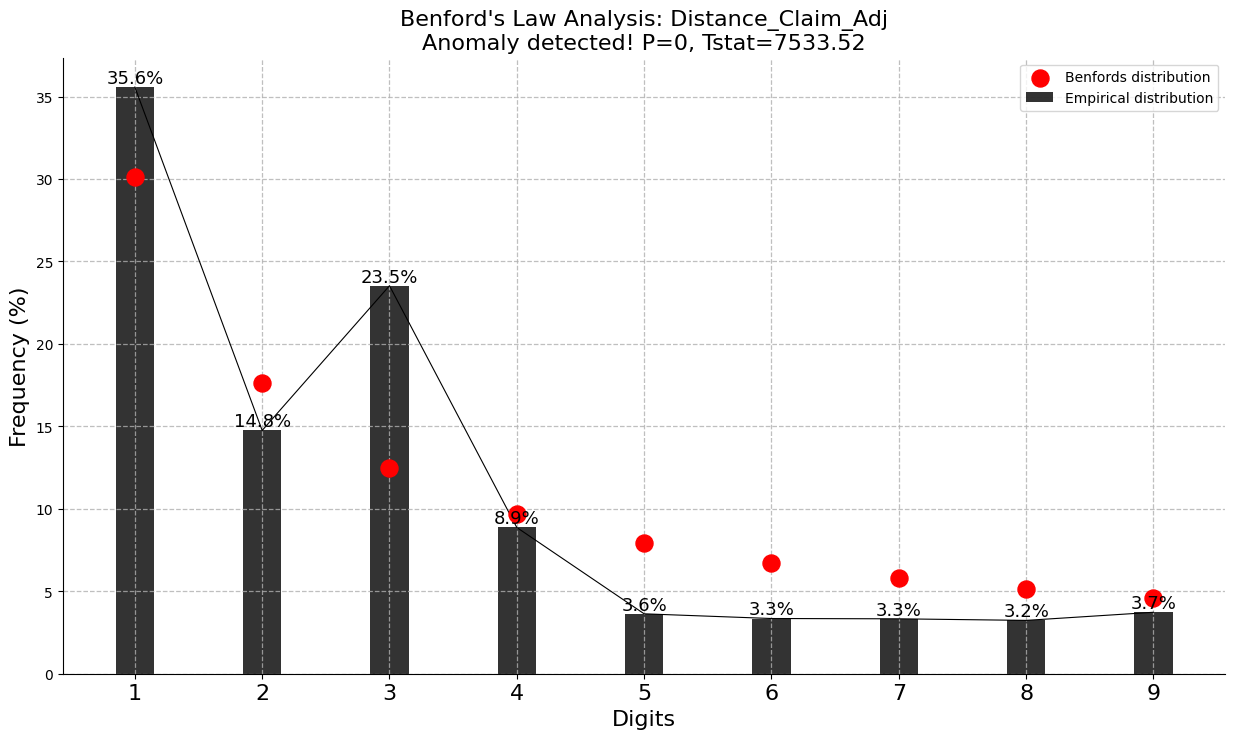

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=3.7628e-126, Tstat=608.343


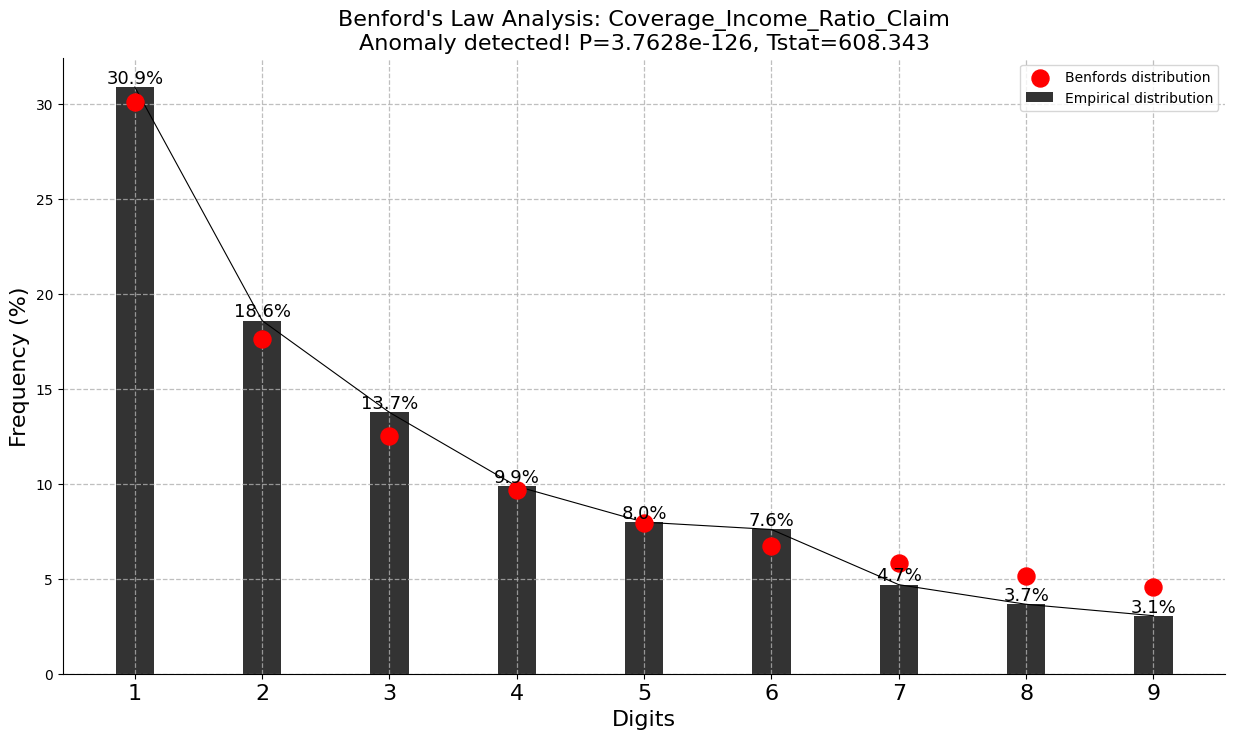

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=9417.75


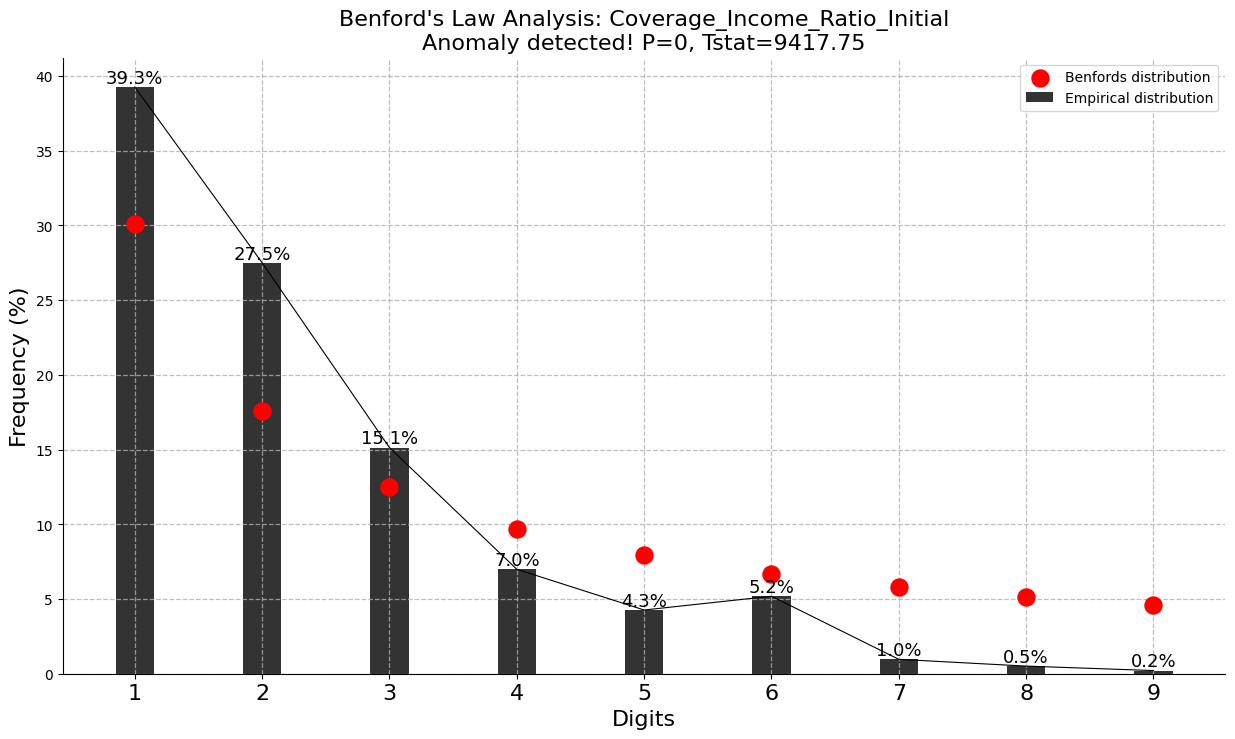

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=2263.88


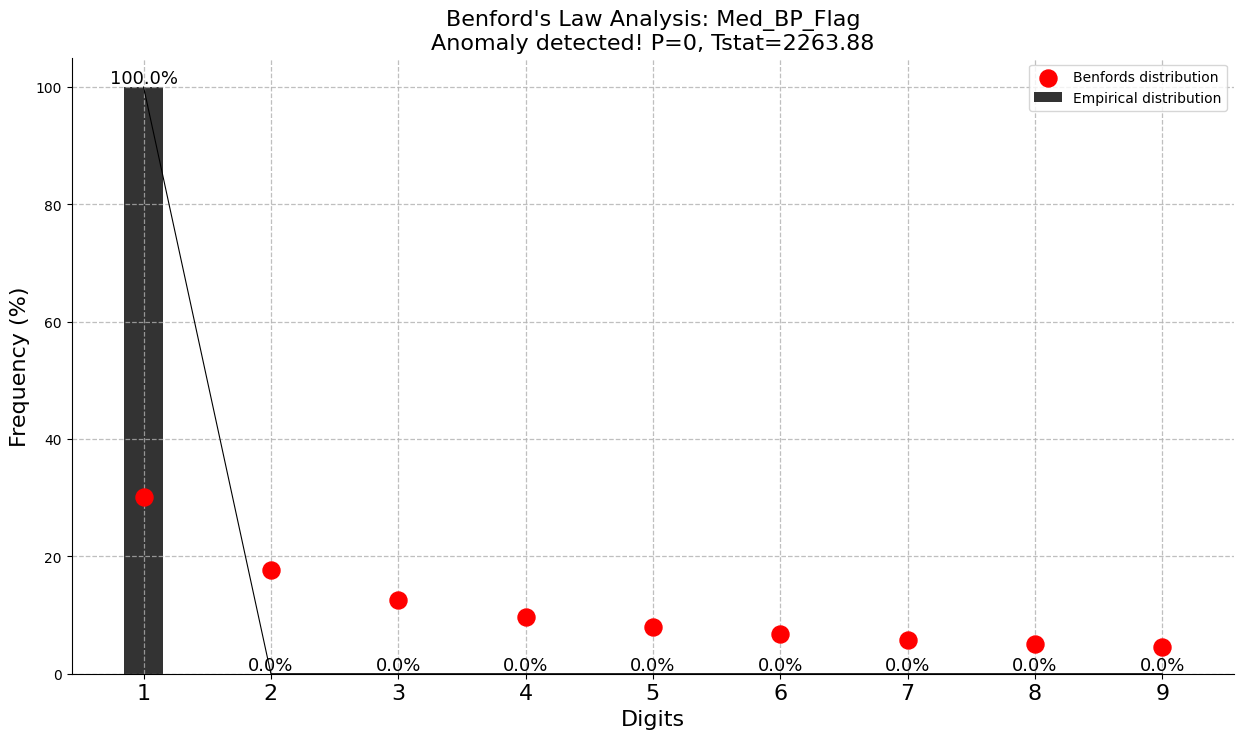

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=2570.37


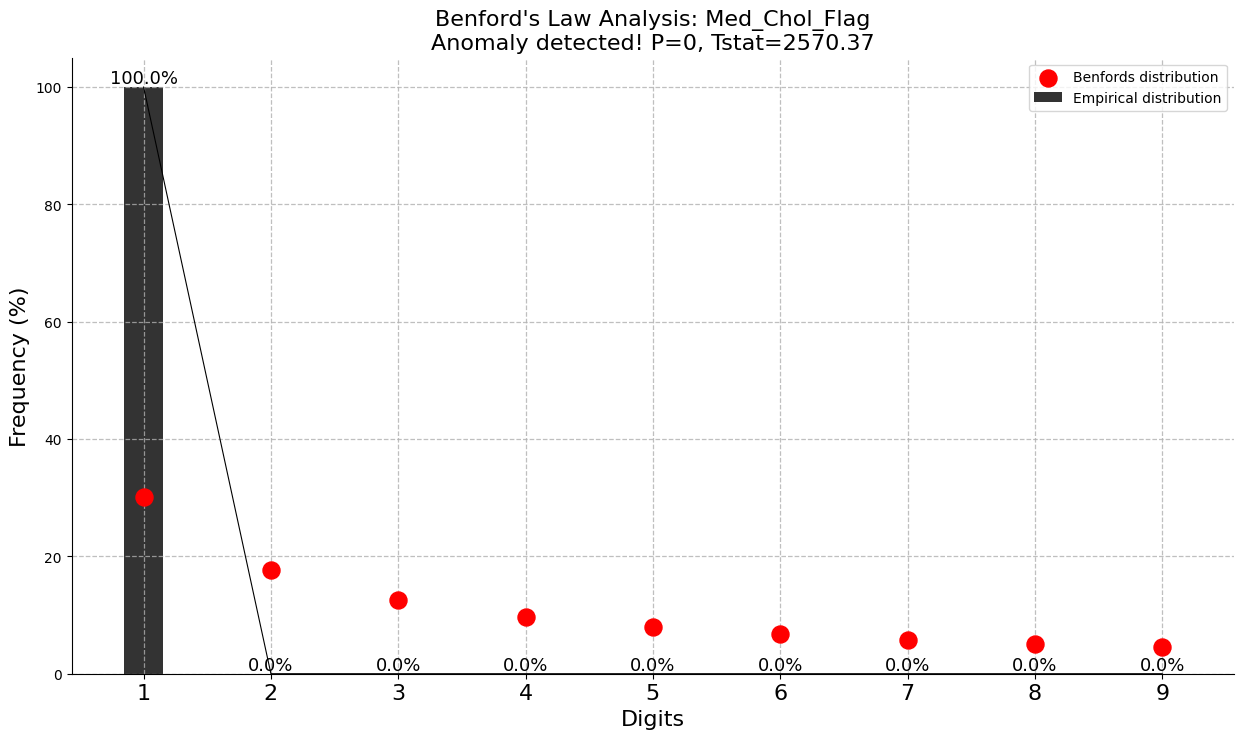

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=1516.22


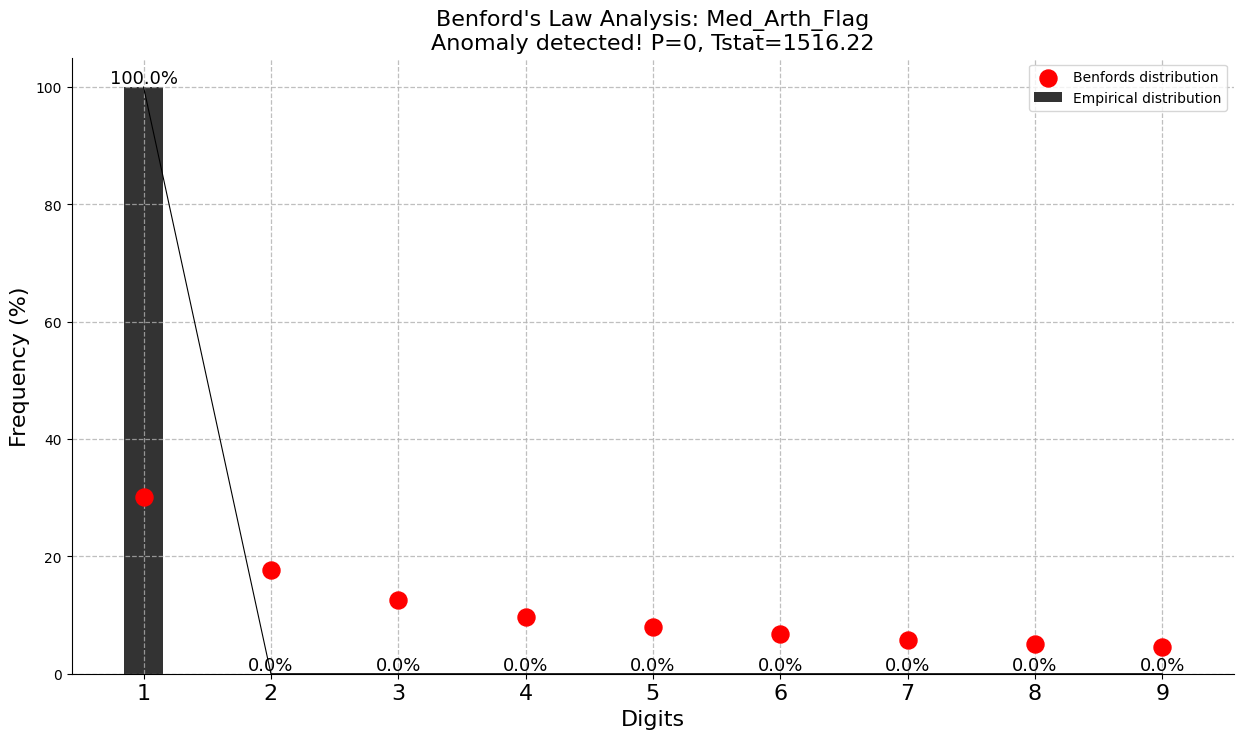

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=1706.62


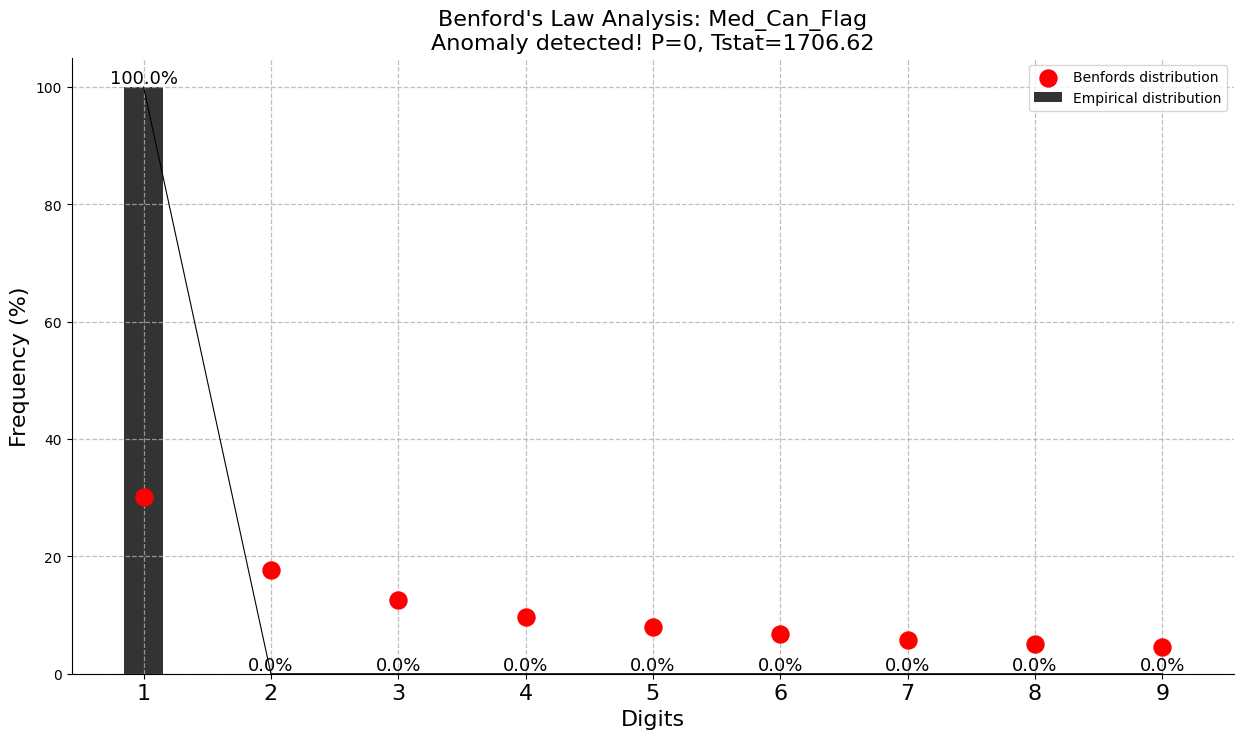

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=1.23168e-142, Tstat=684.969


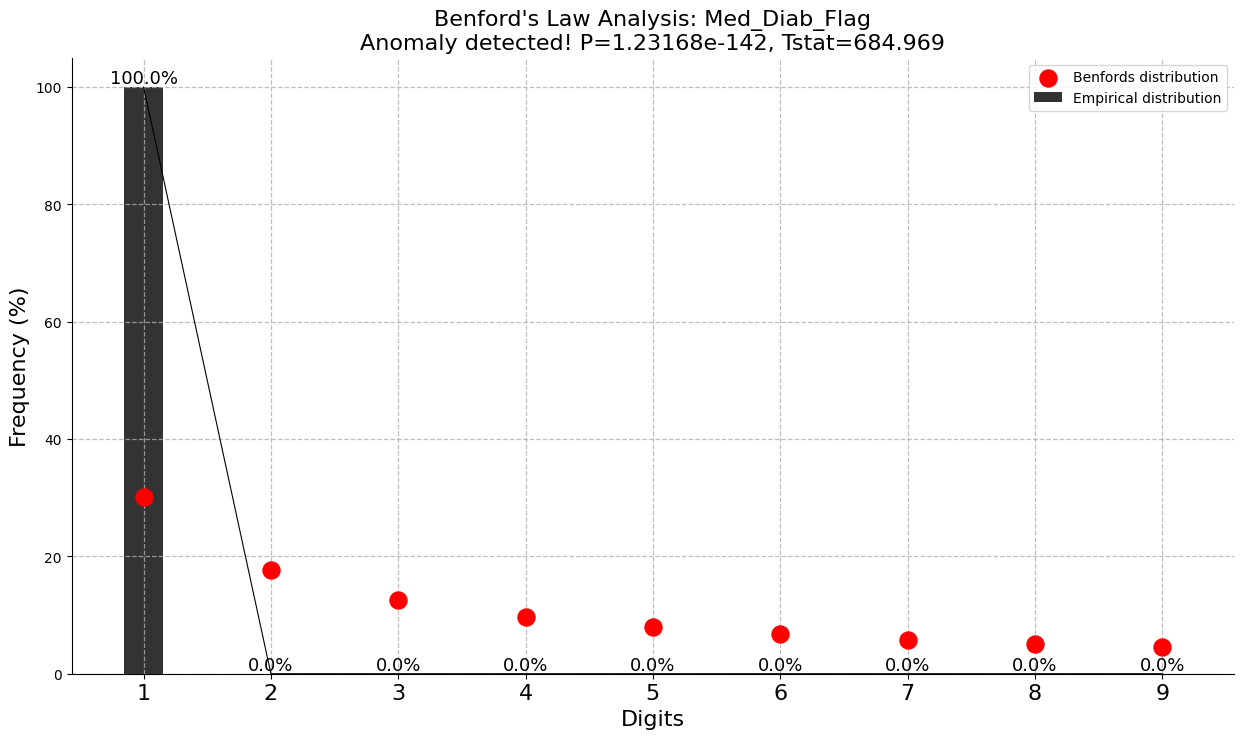

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=1655.53


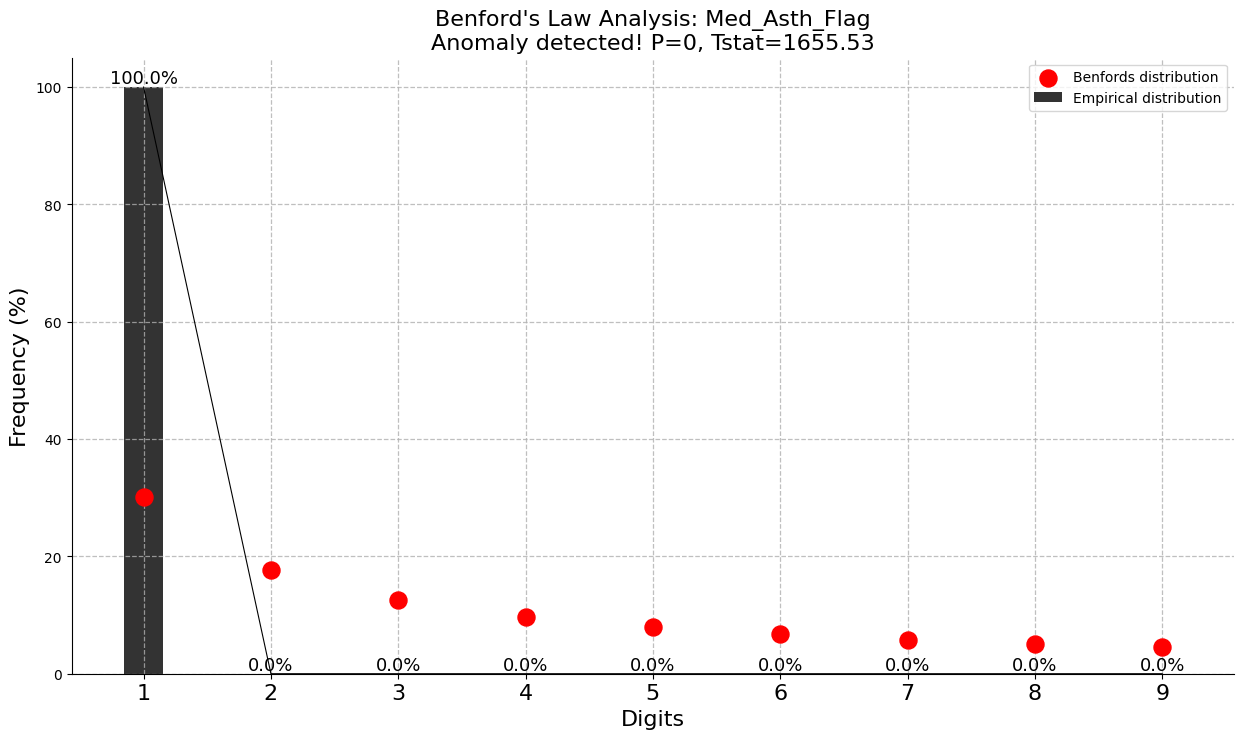

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=2.3316e-22, Tstat=120.74


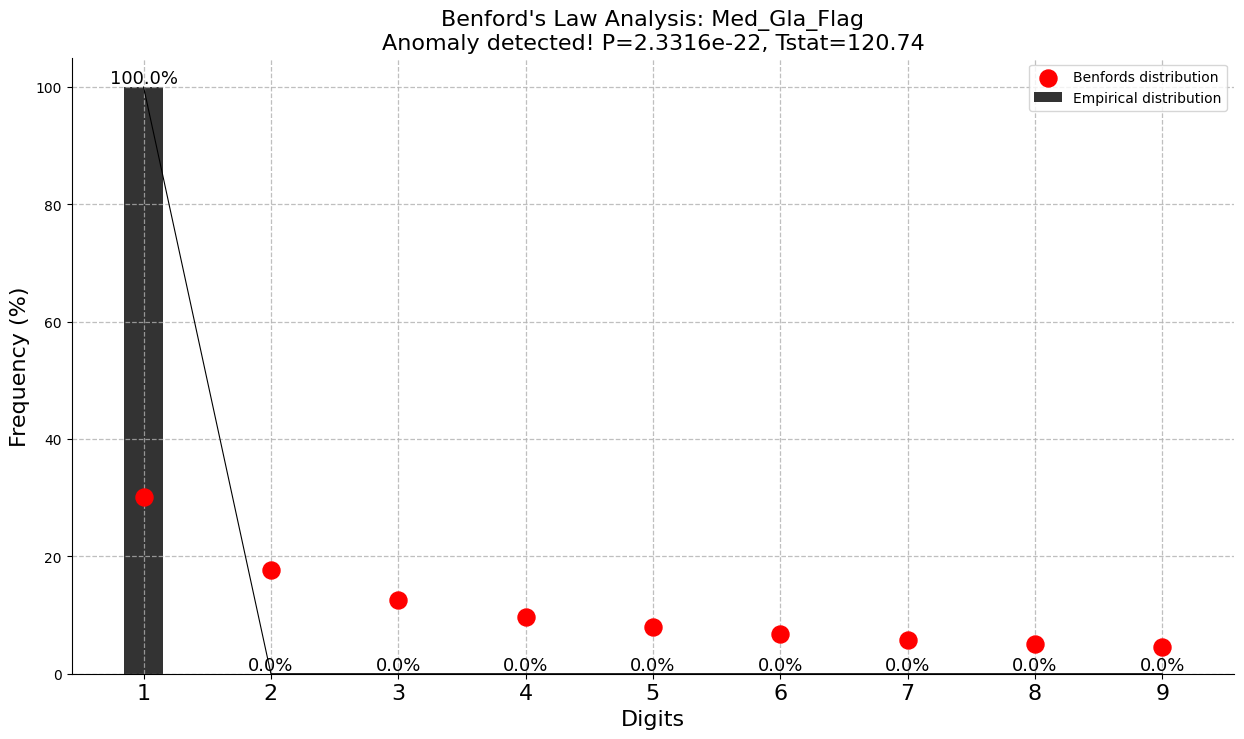

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=2.17064e-268, Tstat=1267.77


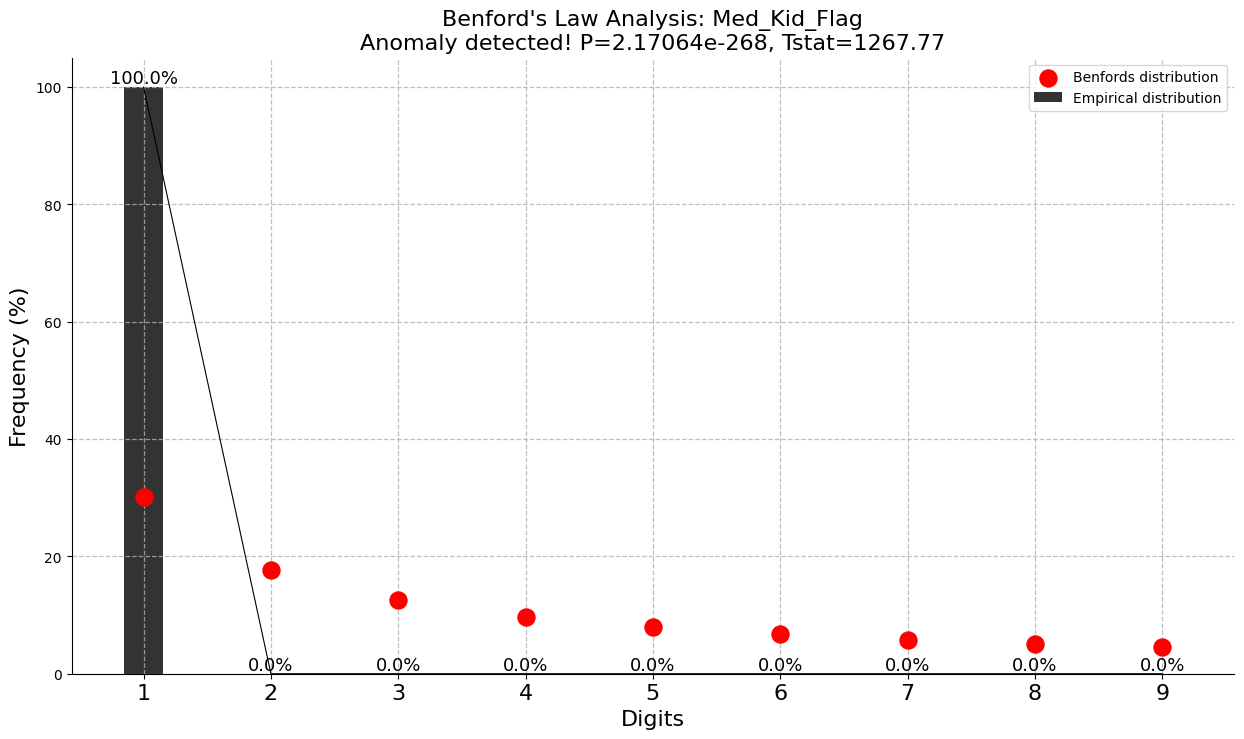

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.794874, Tstat=4.64386


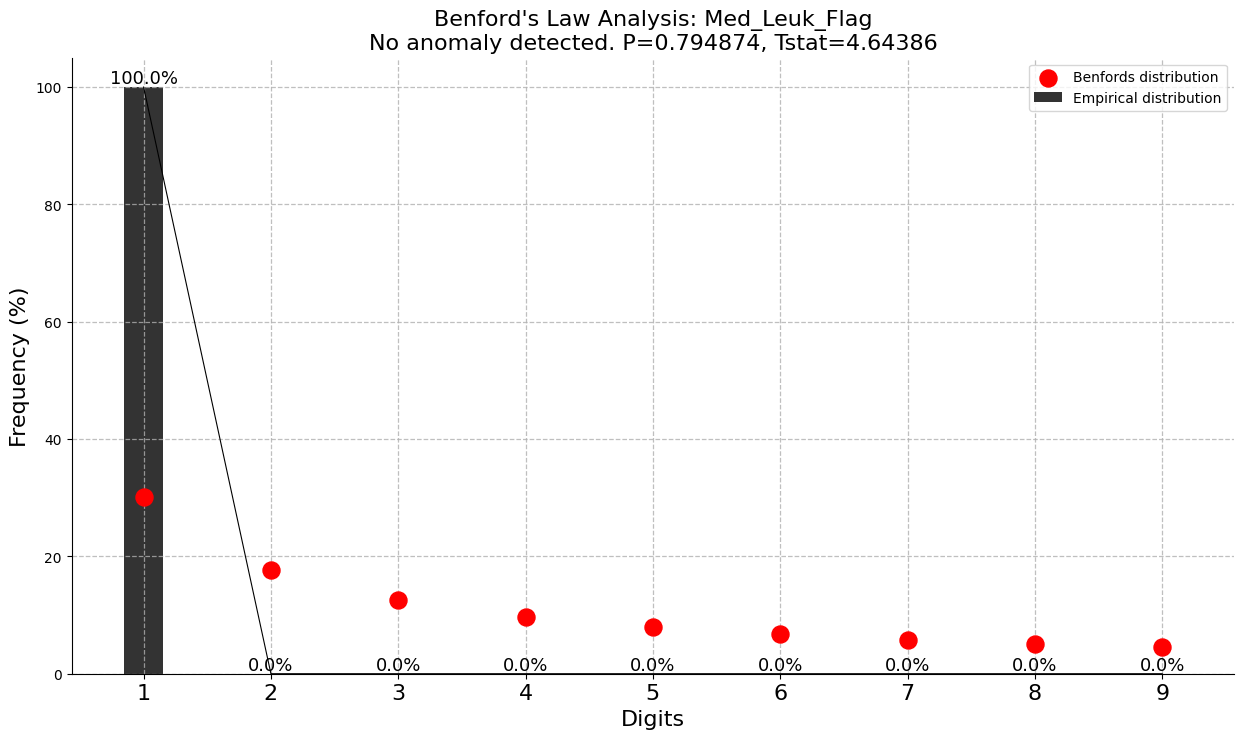

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=1.22552e-161, Tstat=773.202


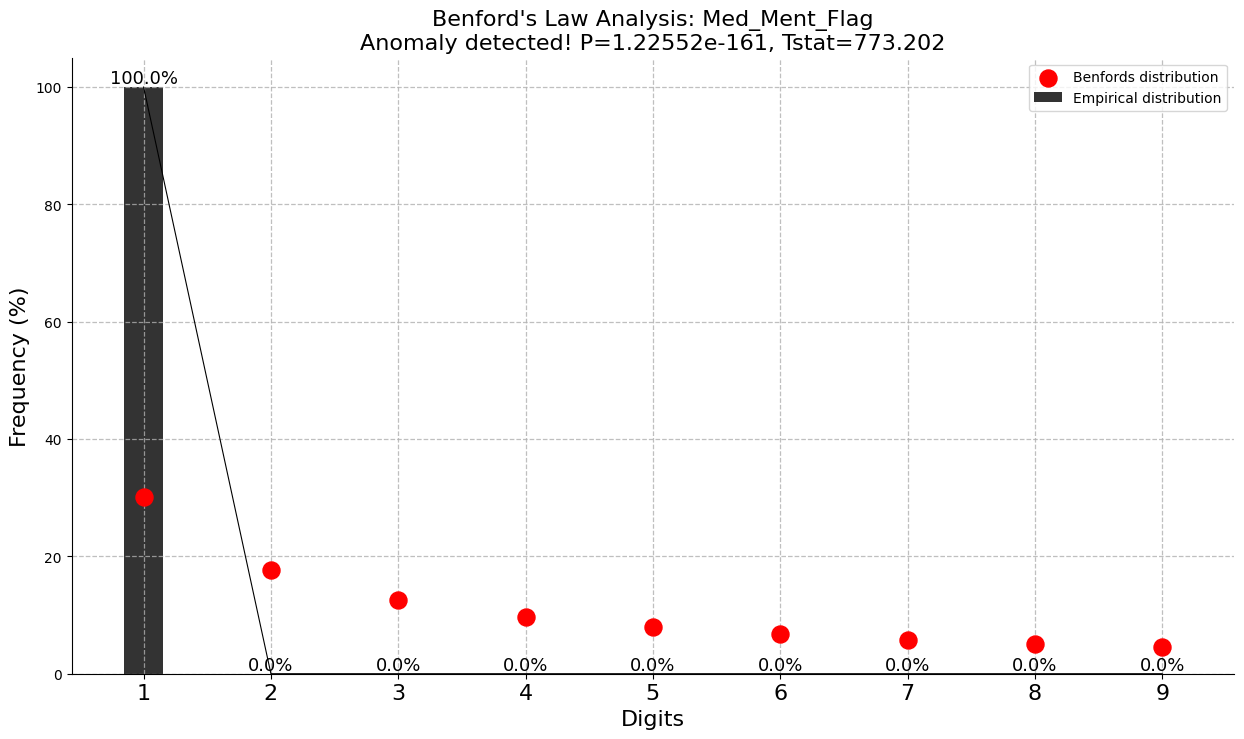

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=1855.22


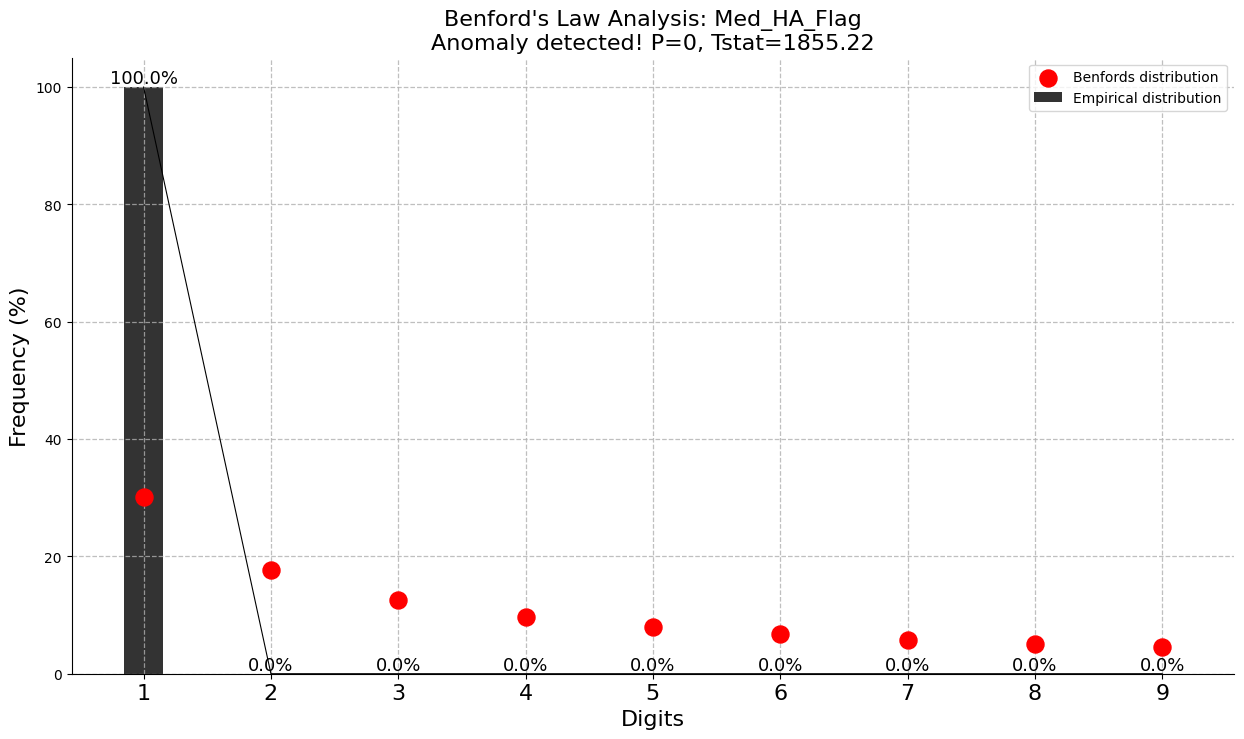

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=1.34886e-29, Tstat=155.569


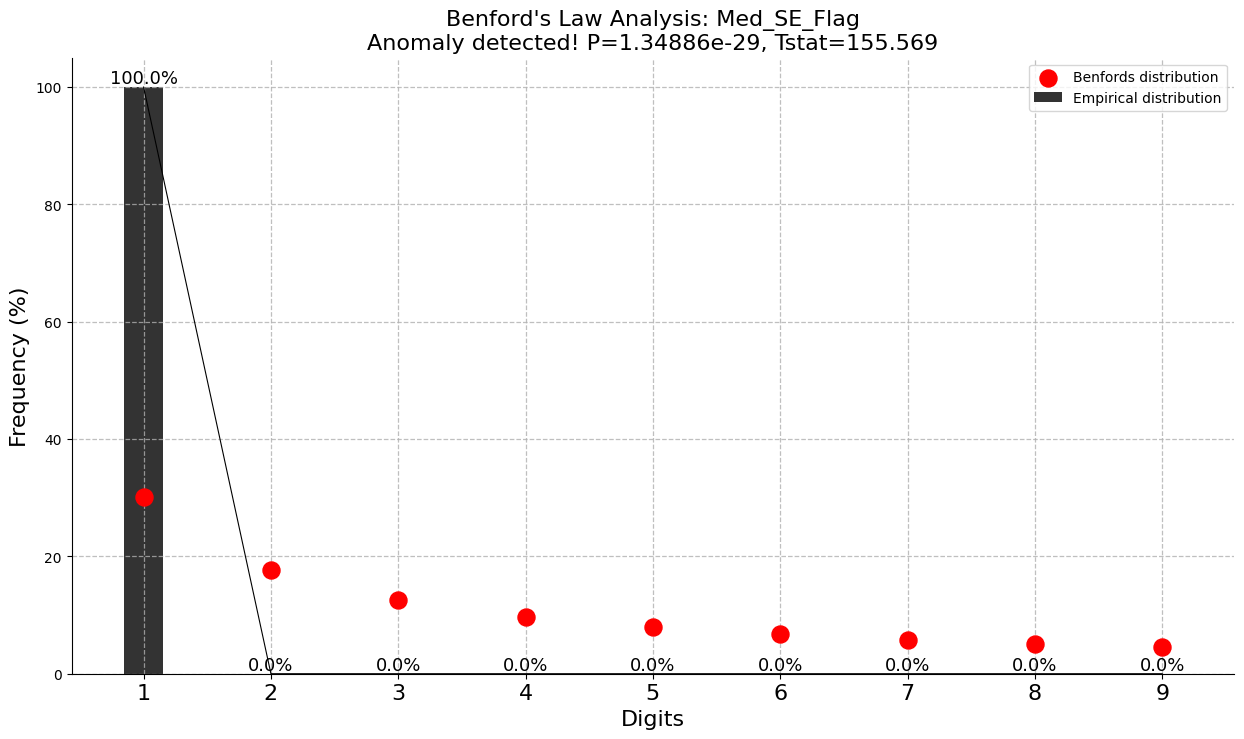

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0.0173028, Tstat=18.5754


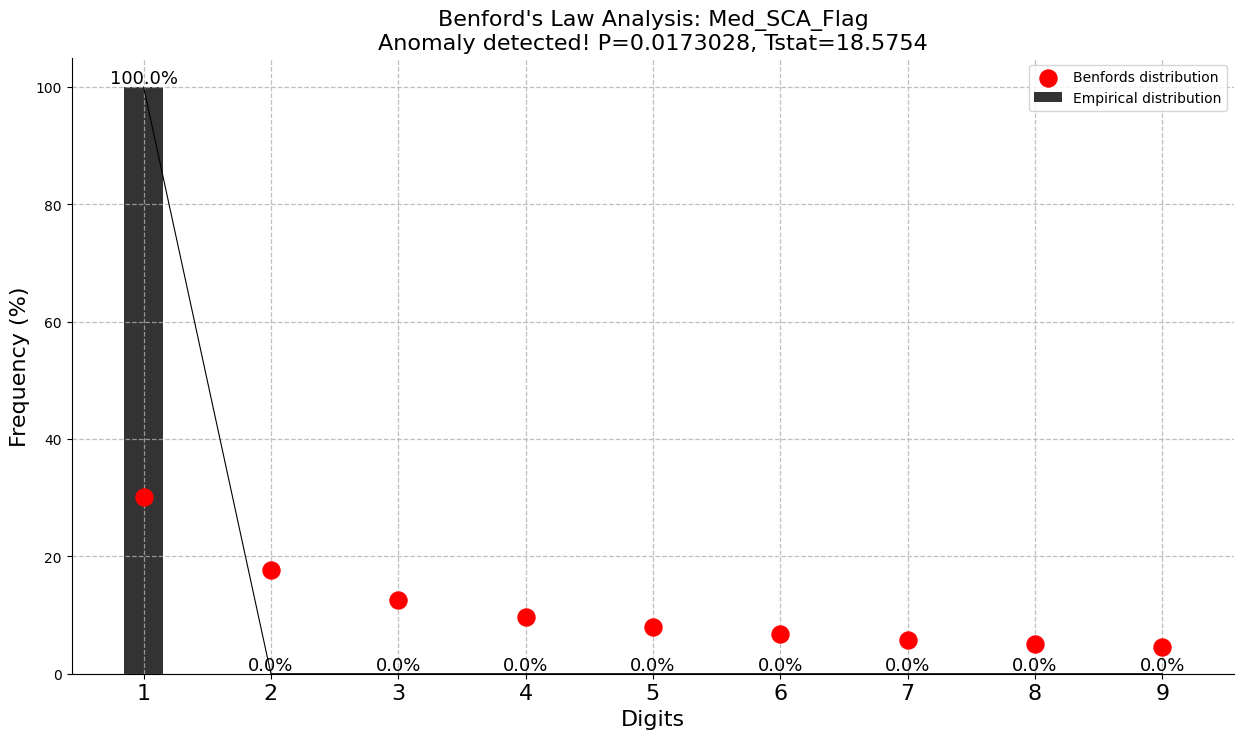

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=1.47982e-06, Tstat=41.7947


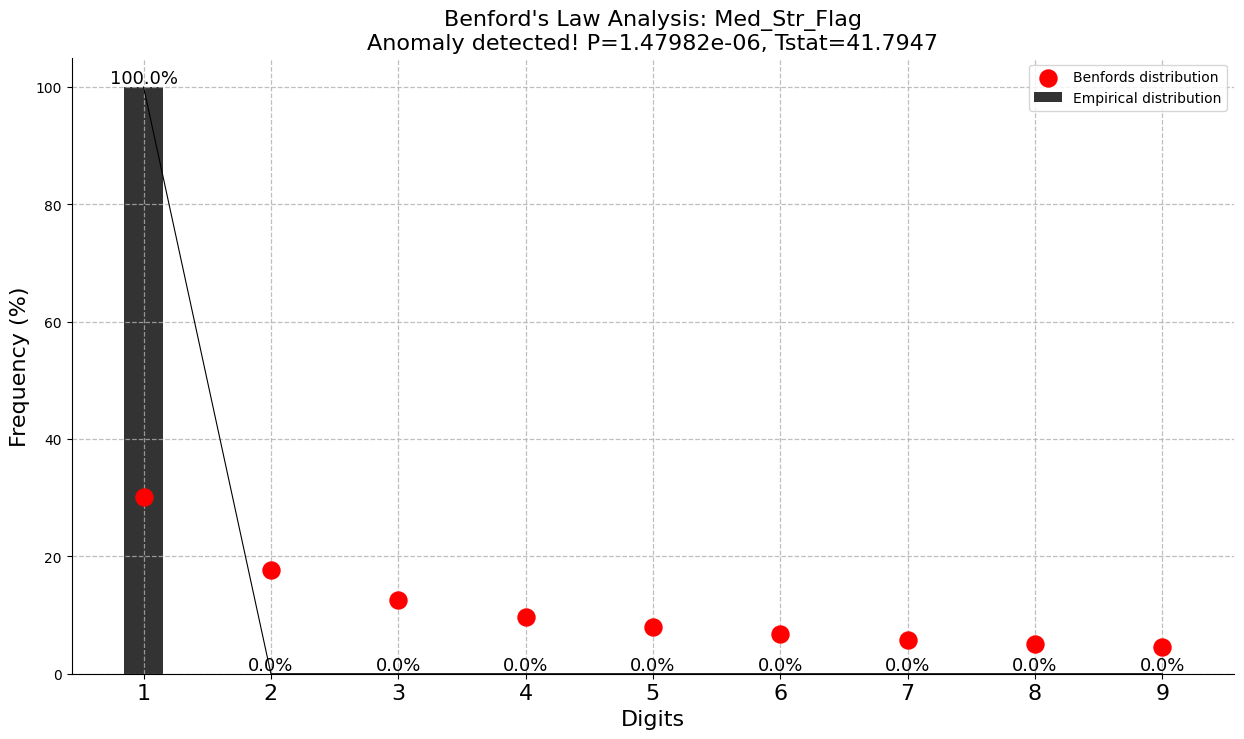

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=1.23366e-144, Tstat=694.257


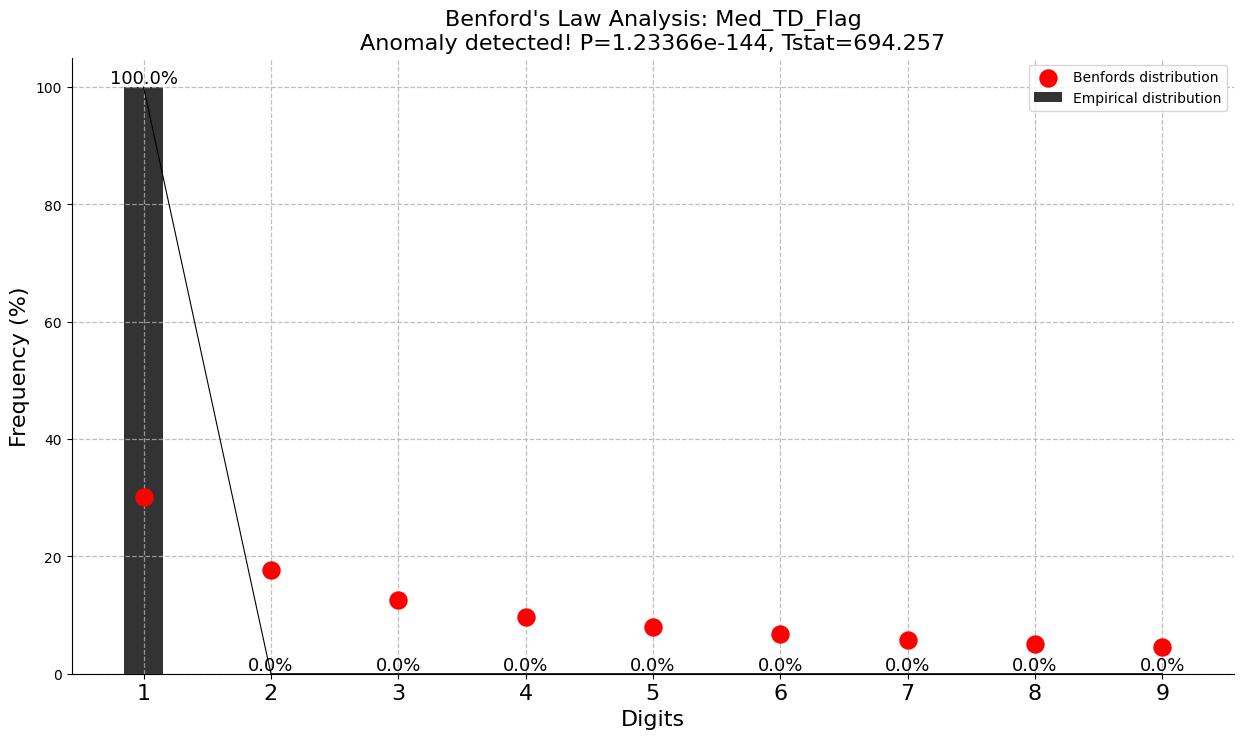

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.969518, Tstat=2.32193


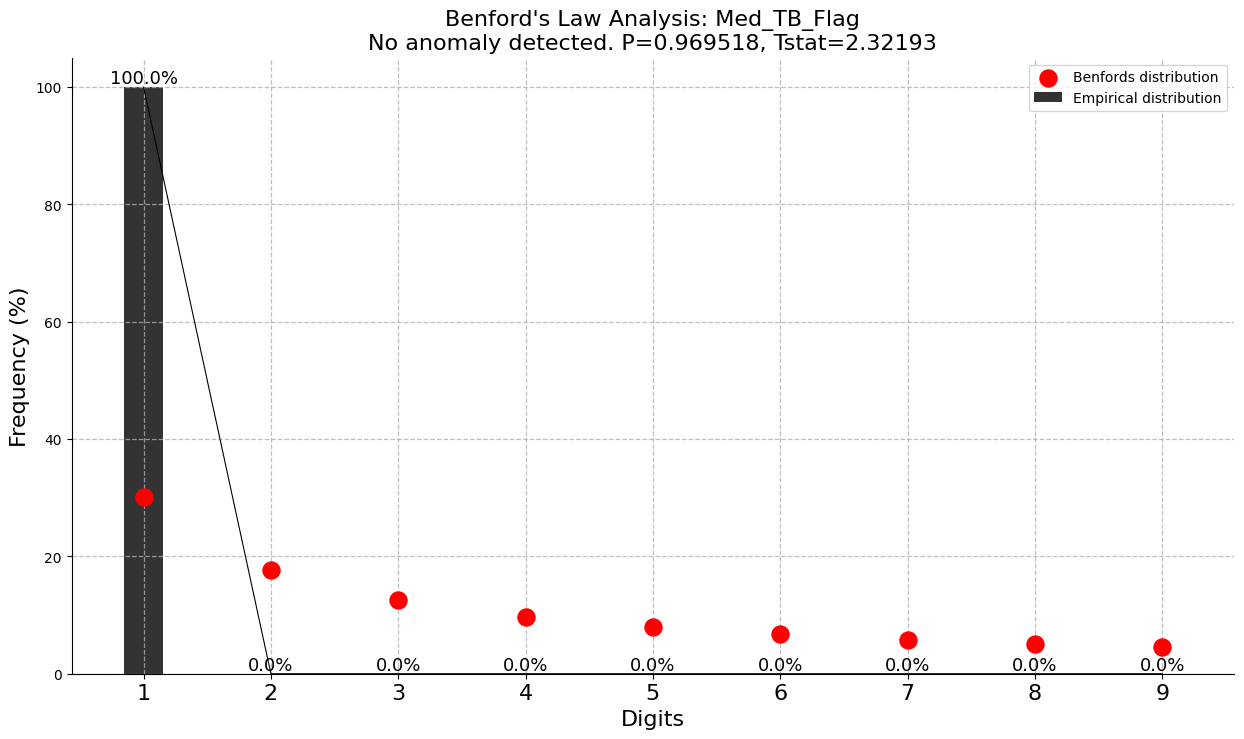

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=3.13372e-217, Tstat=1030.94


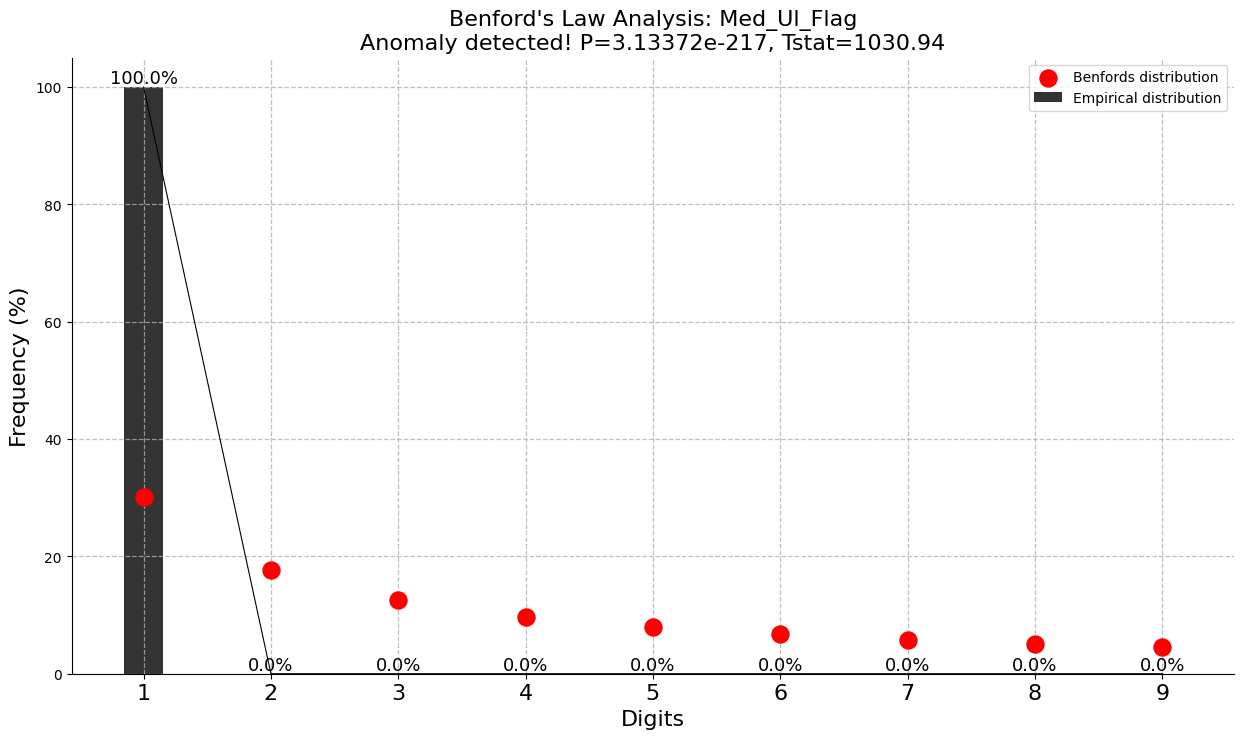

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=7.10768e-74, Tstat=364.543


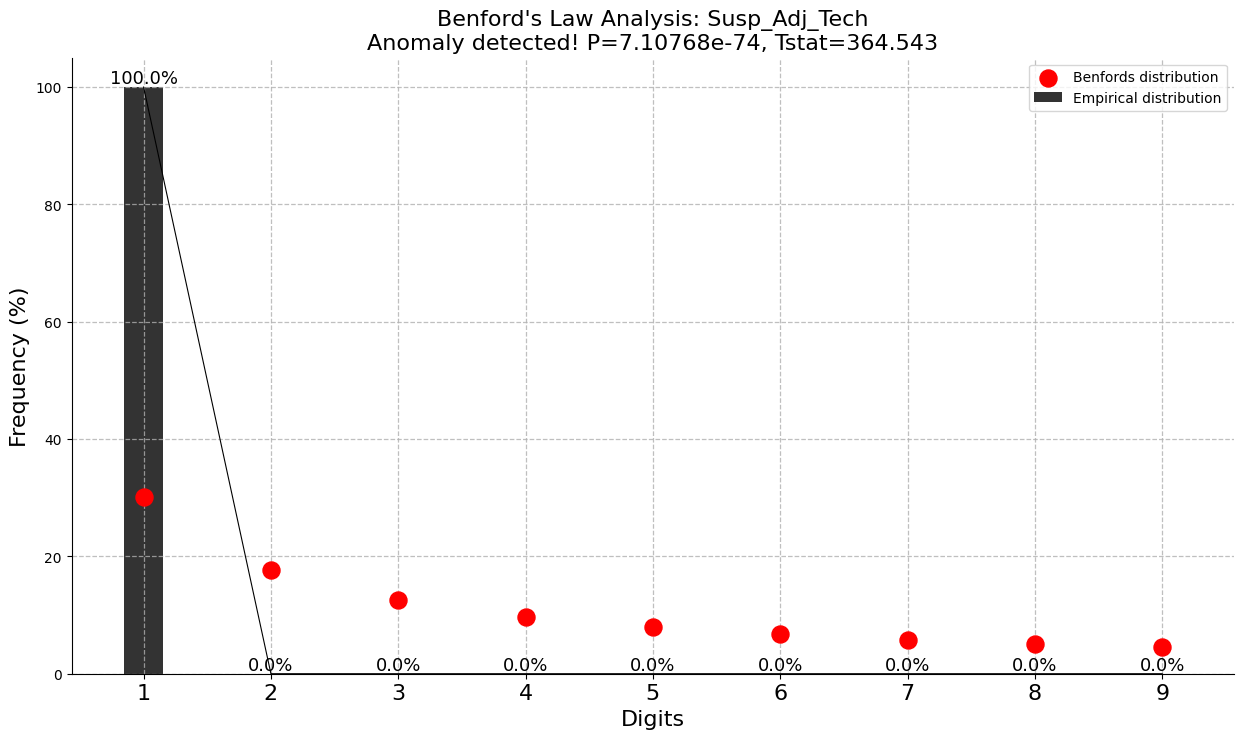

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=3083.85


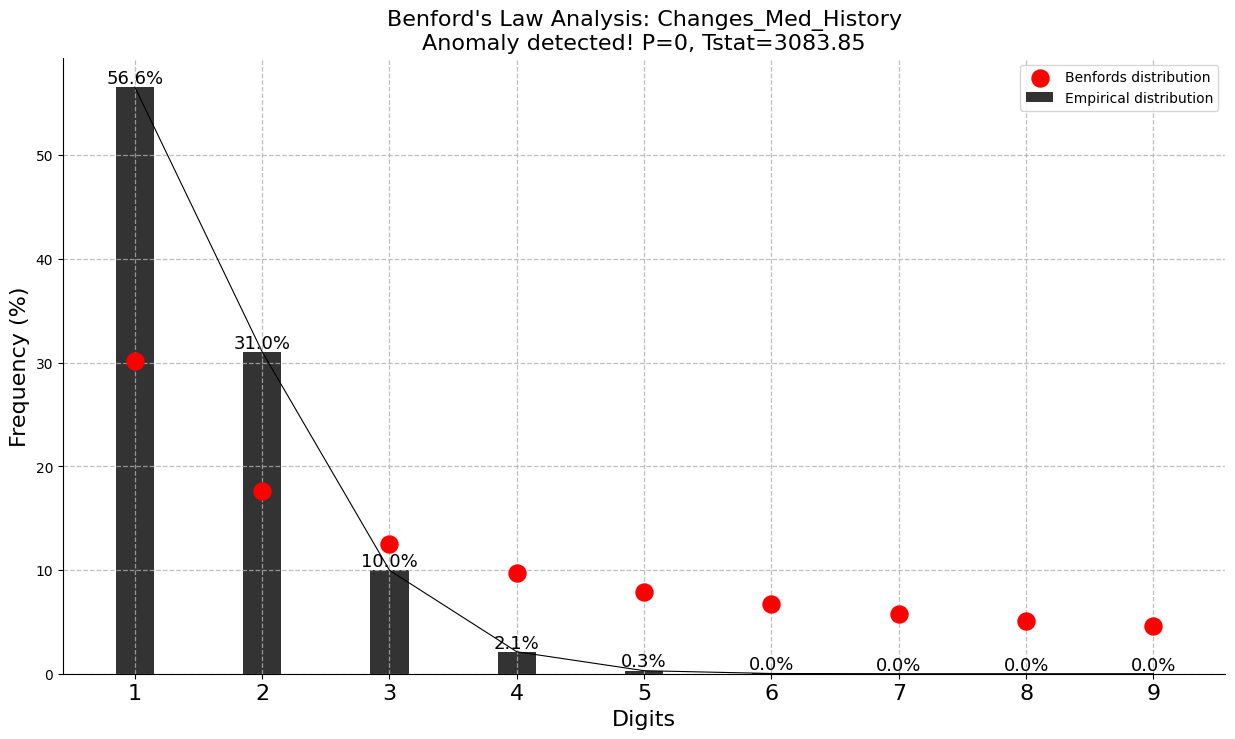

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=132860


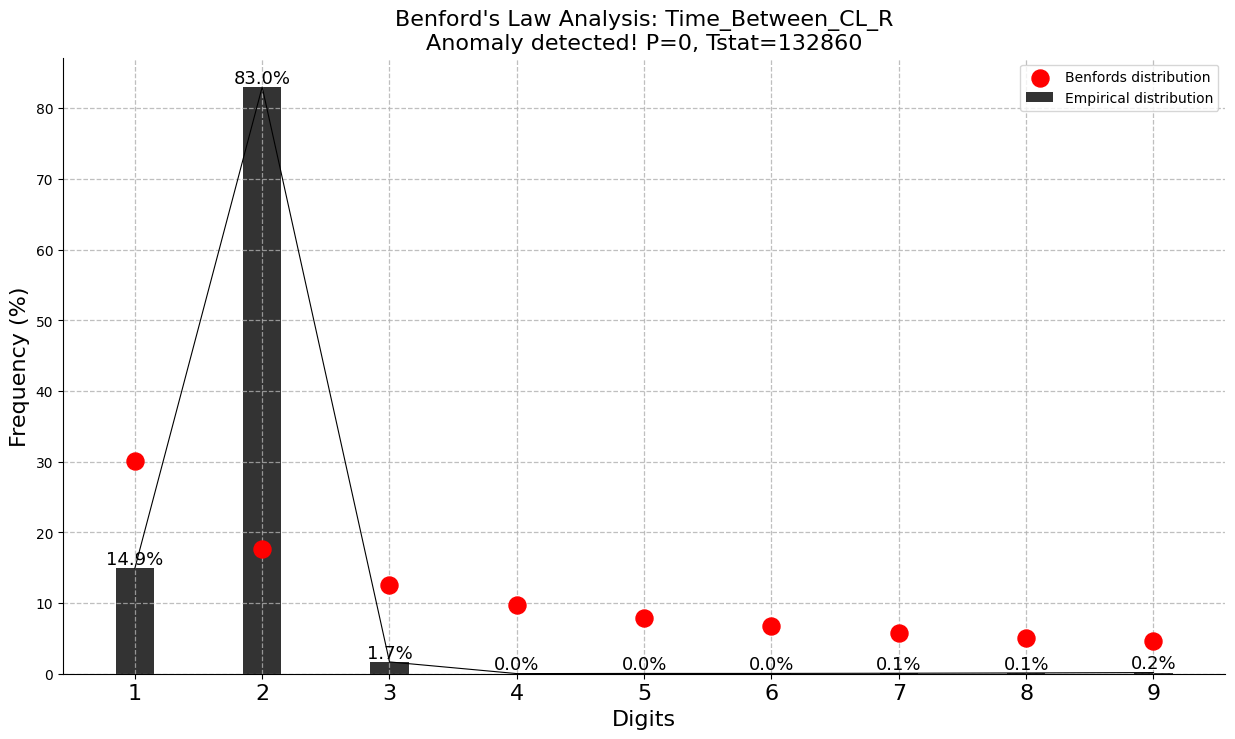

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=57622.5


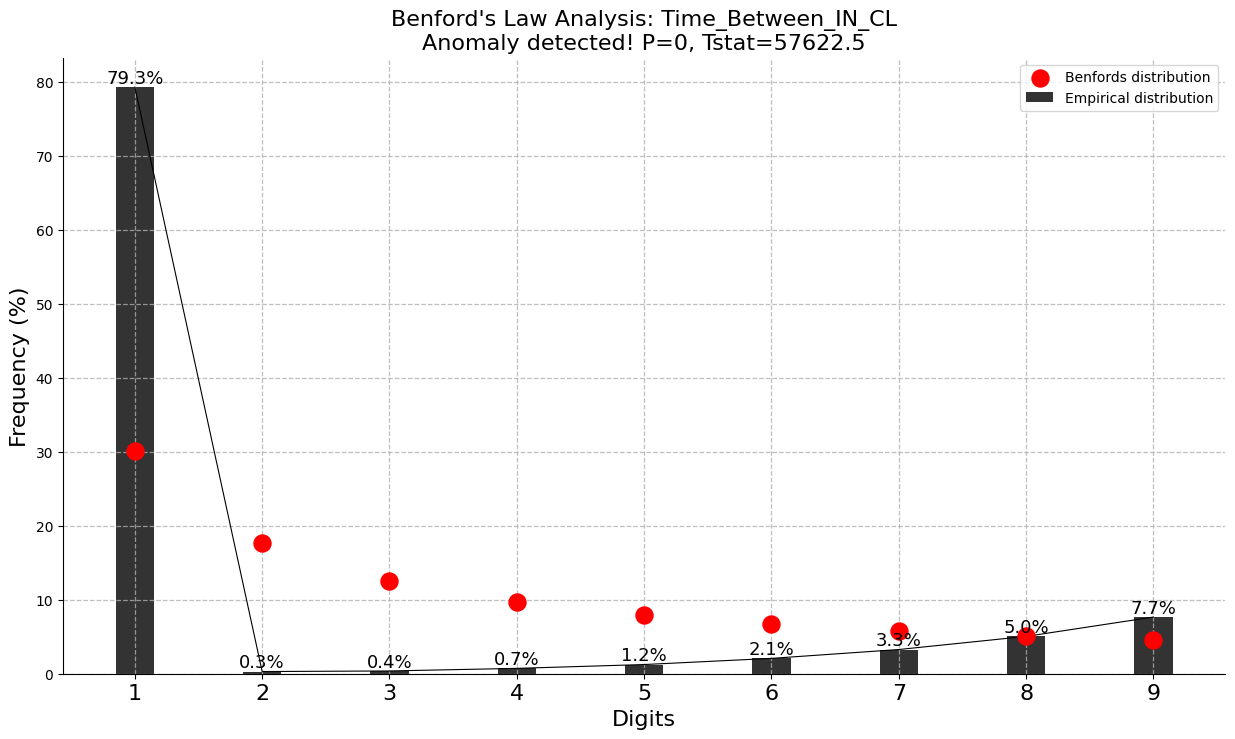

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=7005.26


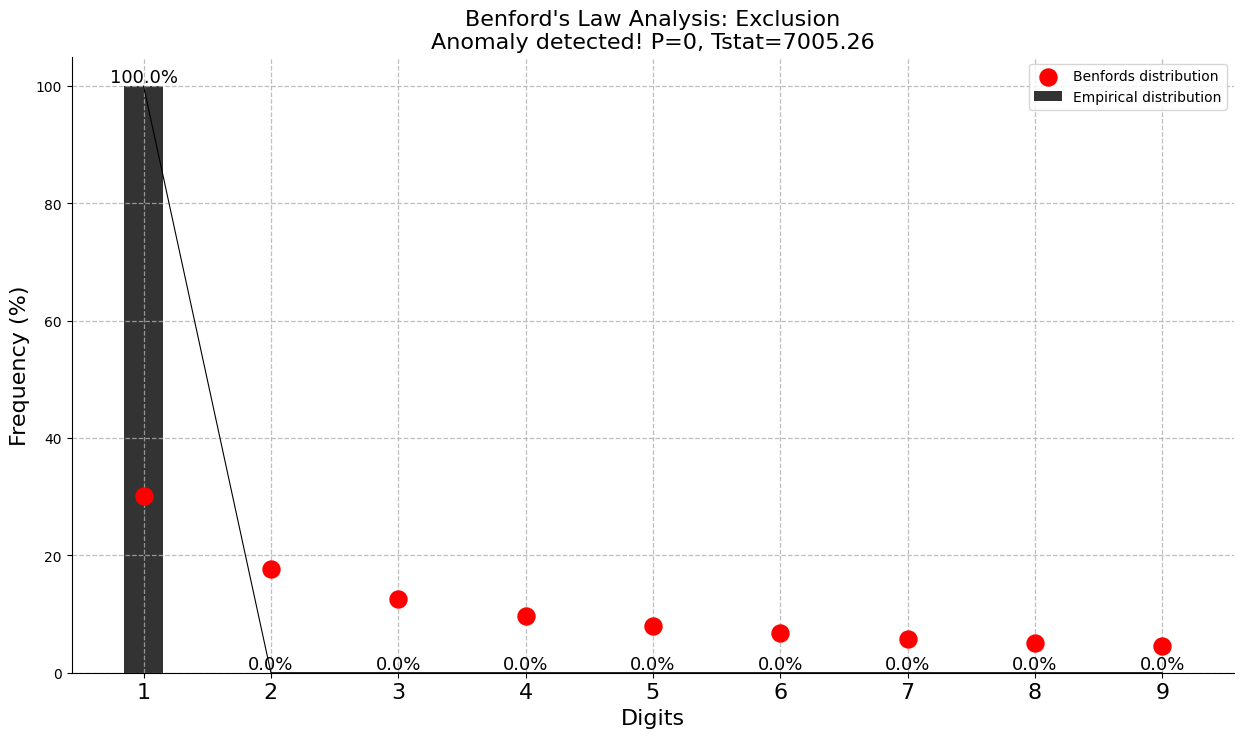

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=9832.56


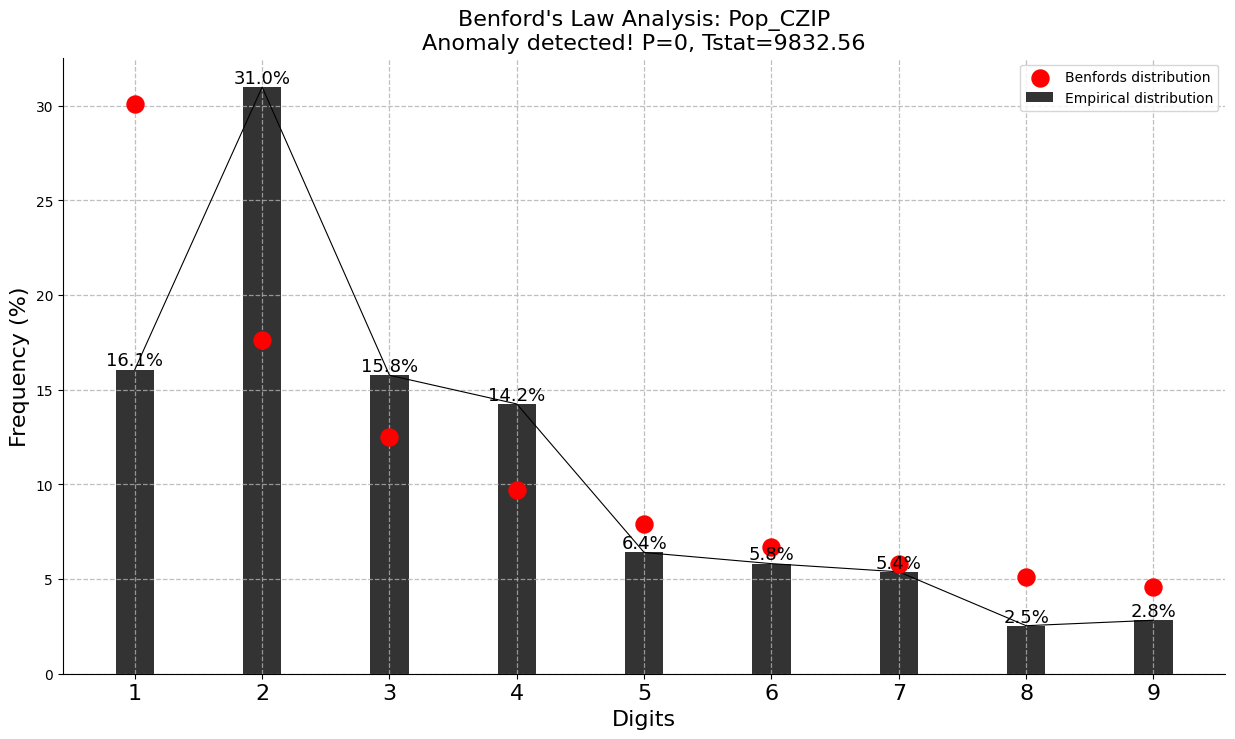

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=19501.5


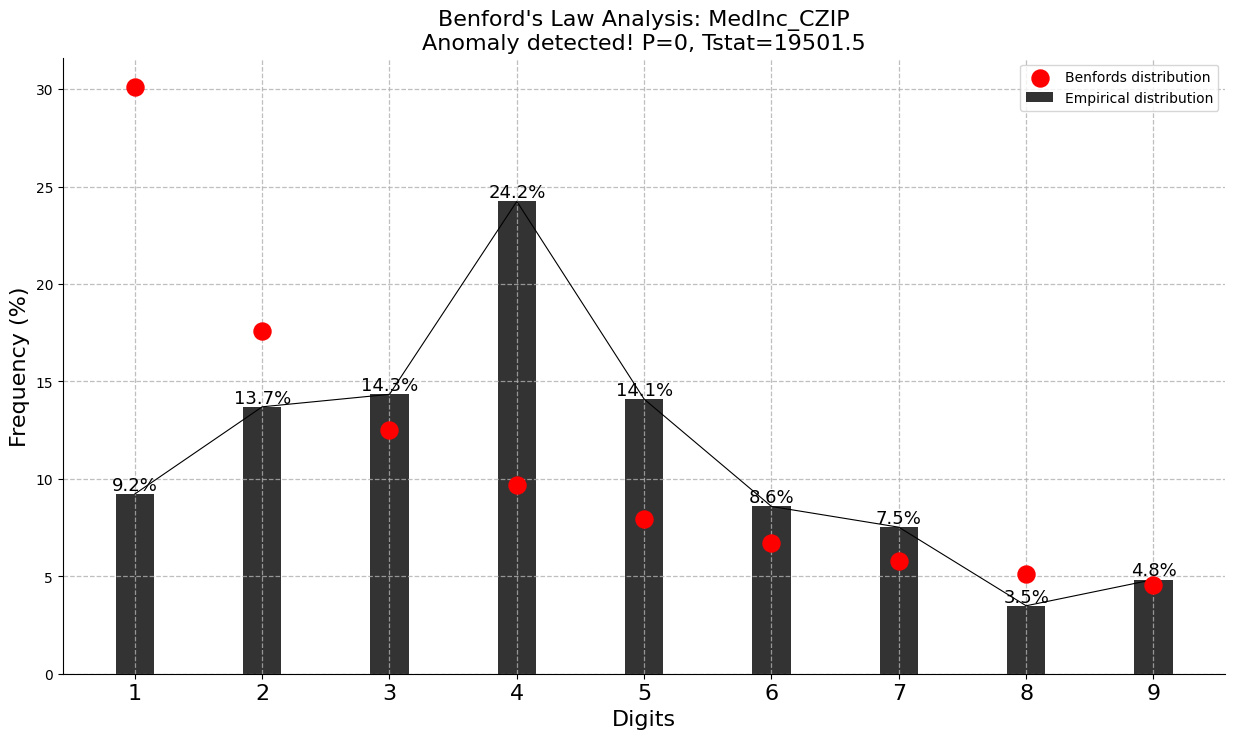

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=71925.4


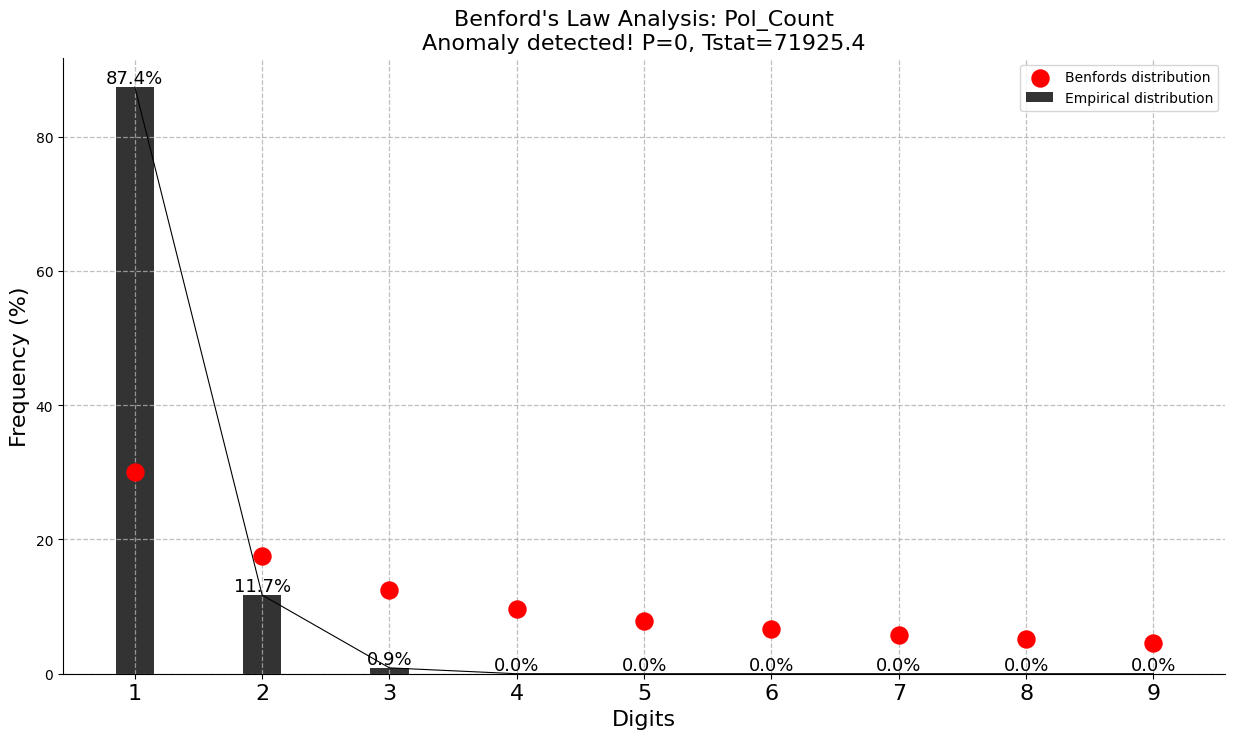

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=1.62839e-162, Tstat=777.27


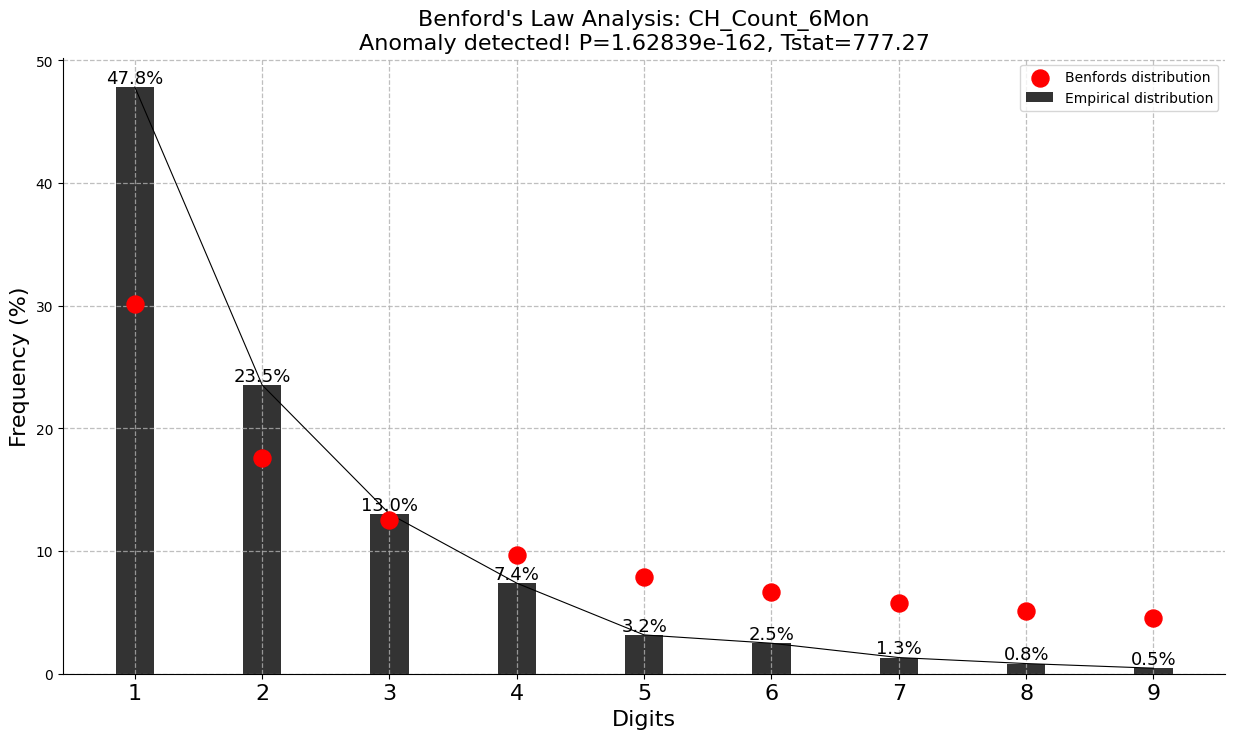

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=3037.35


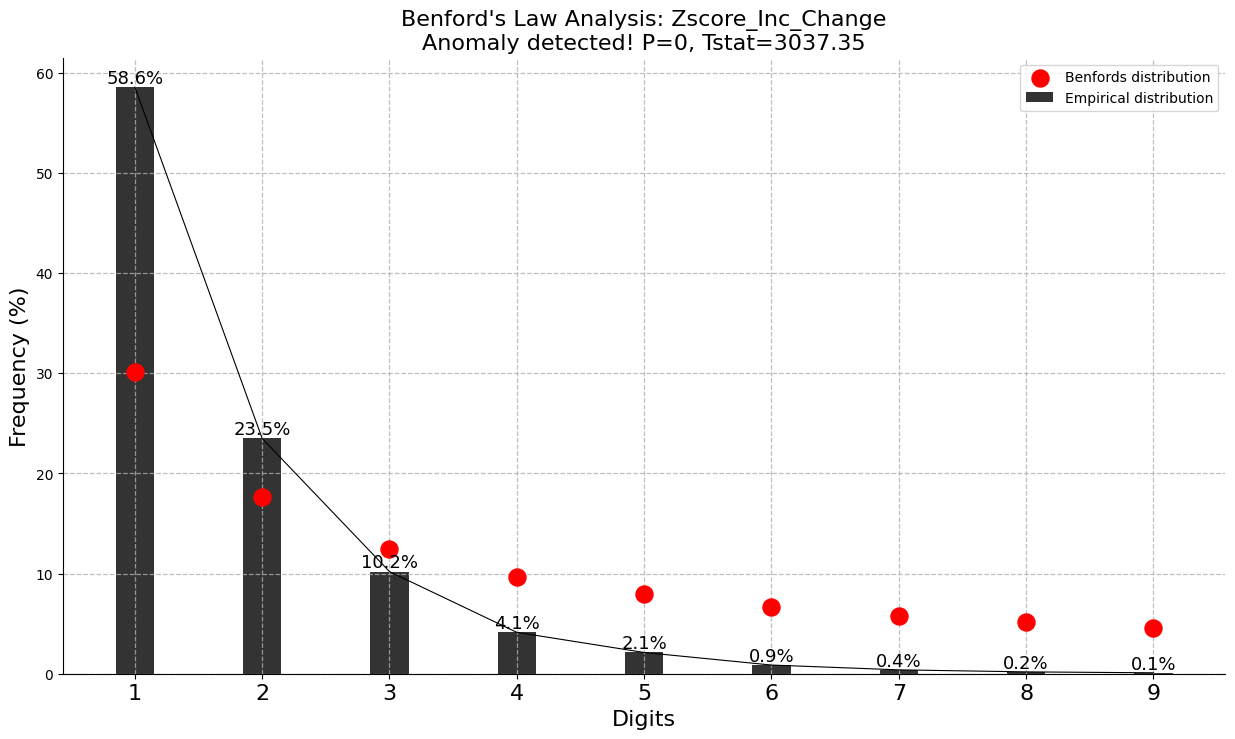

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=96292.7


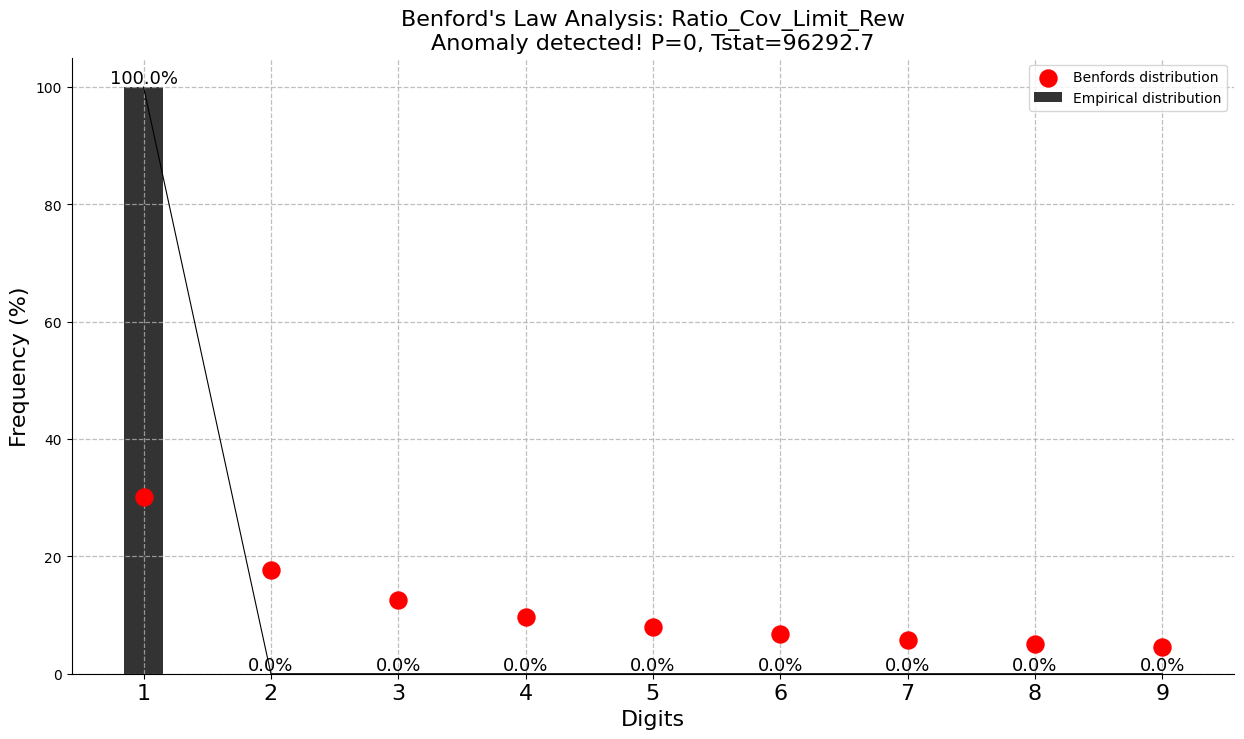

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.0986453, Tstat=13.4053


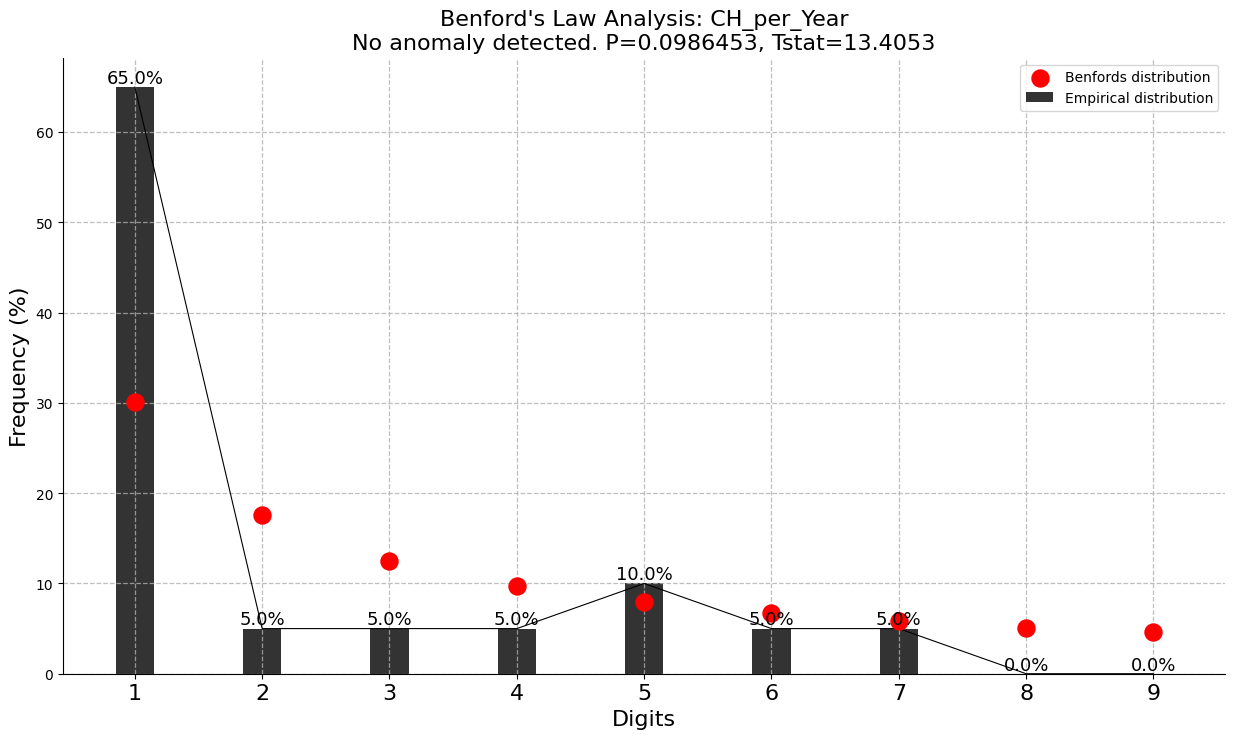

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=98683.3


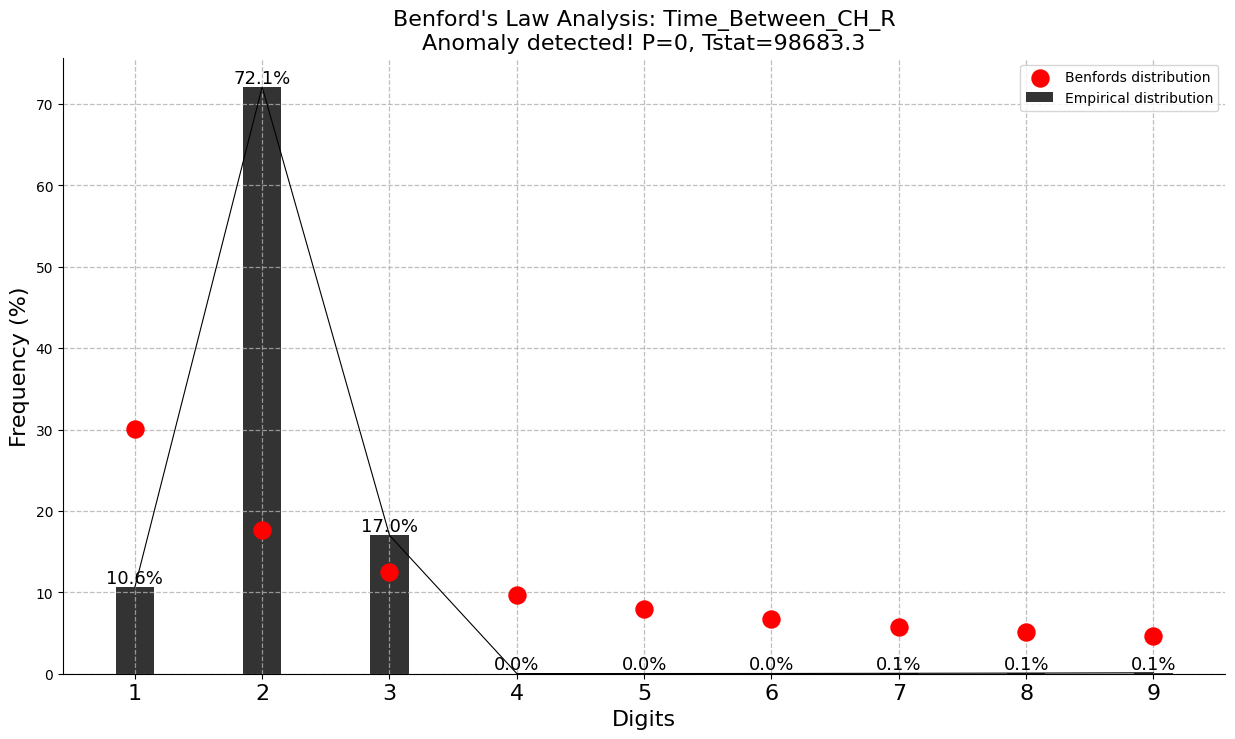

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=6419.89


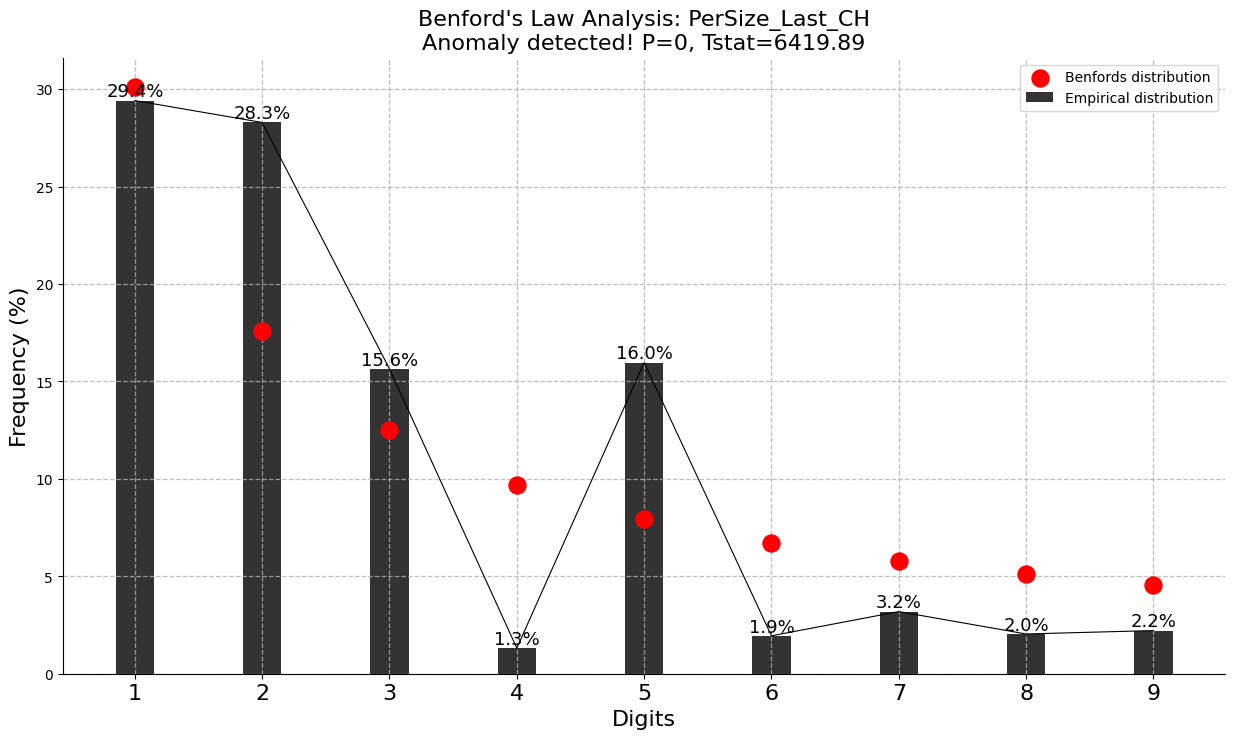

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=96292.7


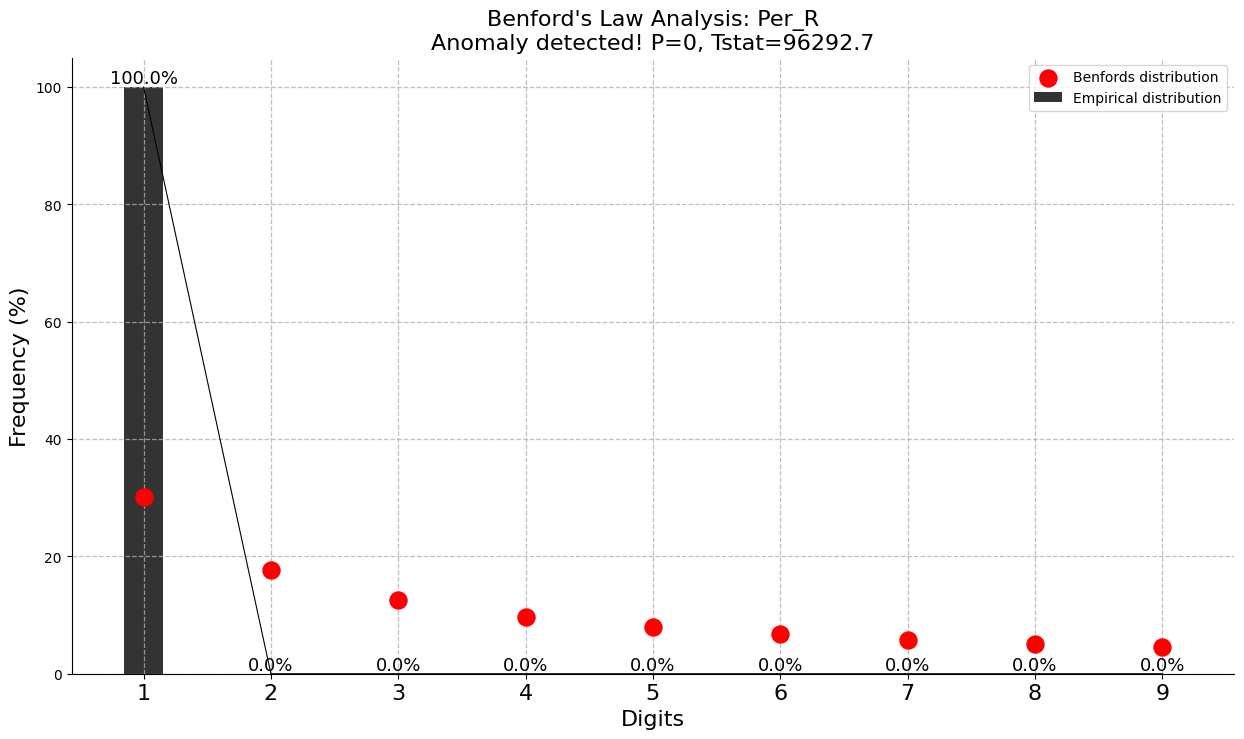

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=718602


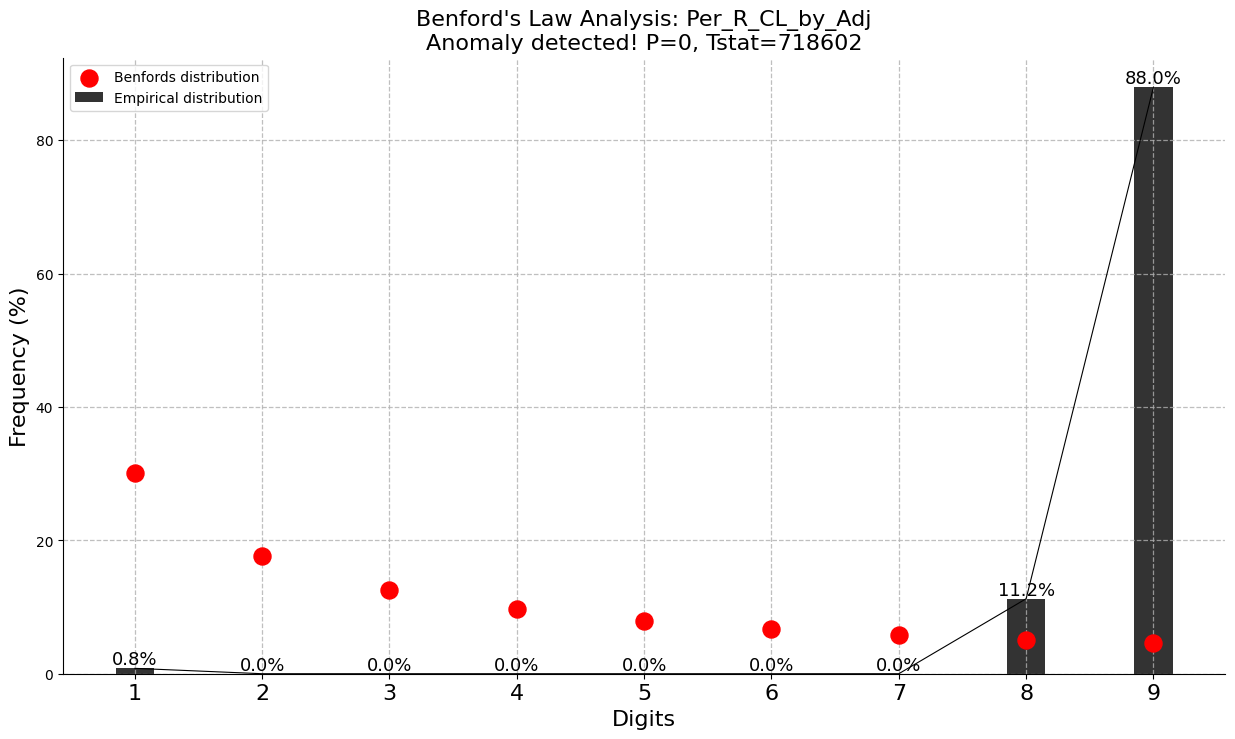

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.0986453, Tstat=13.4053


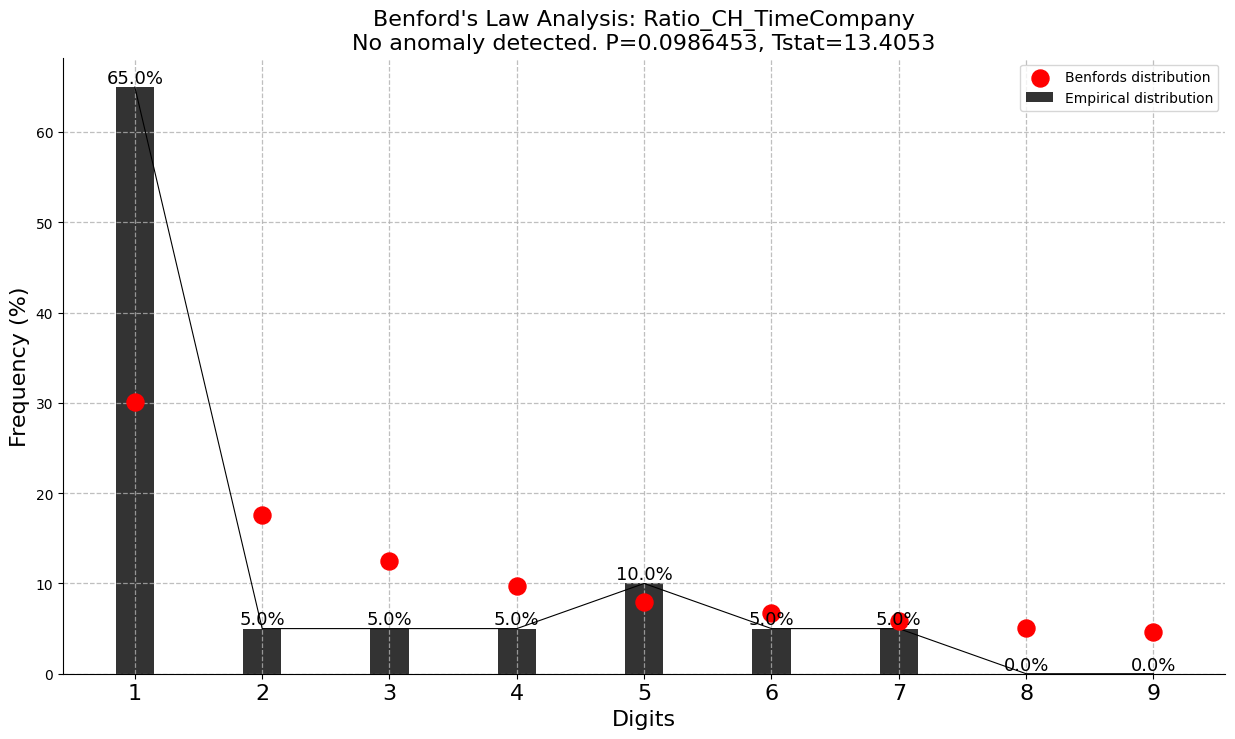

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=99137.9


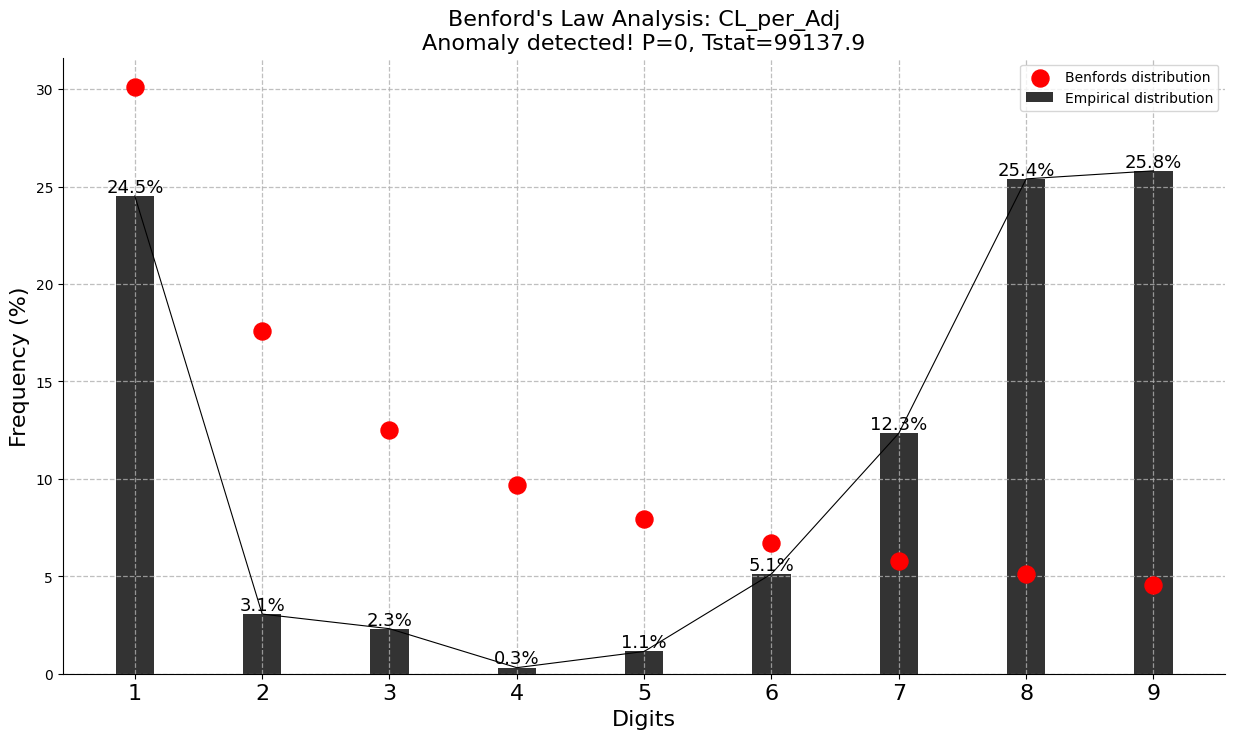

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=17744.1


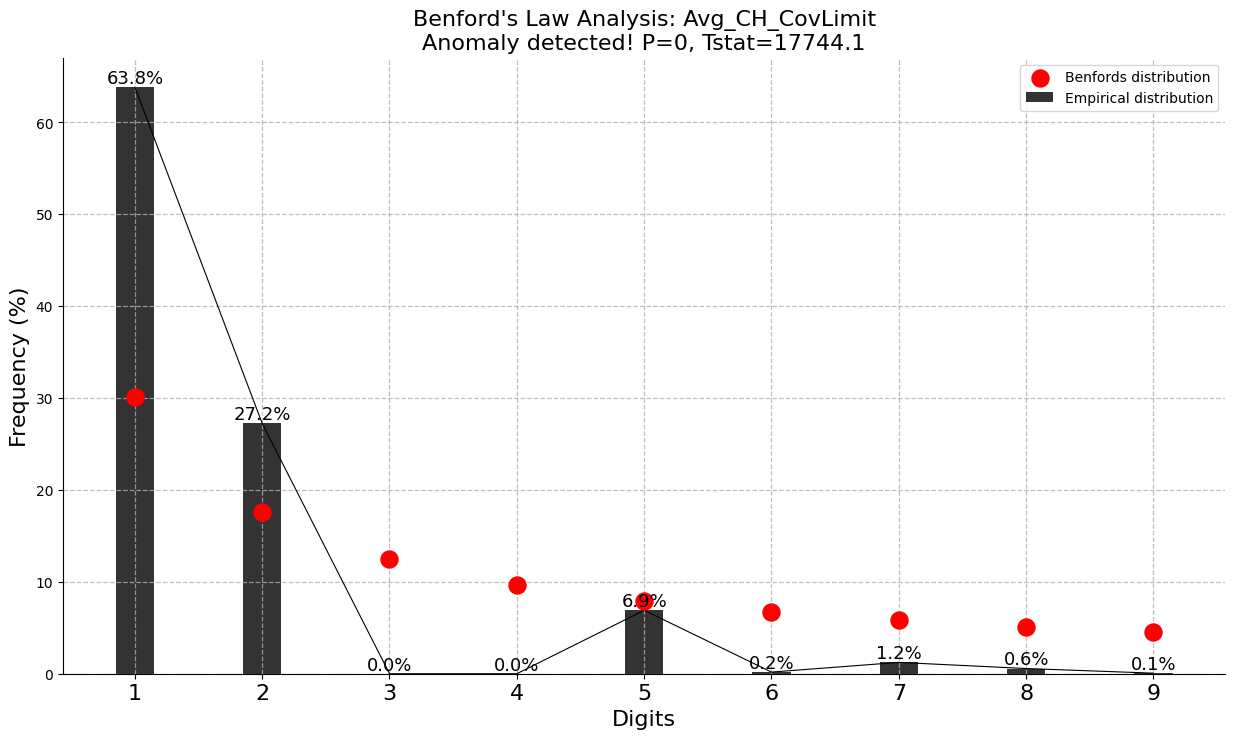

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=72006


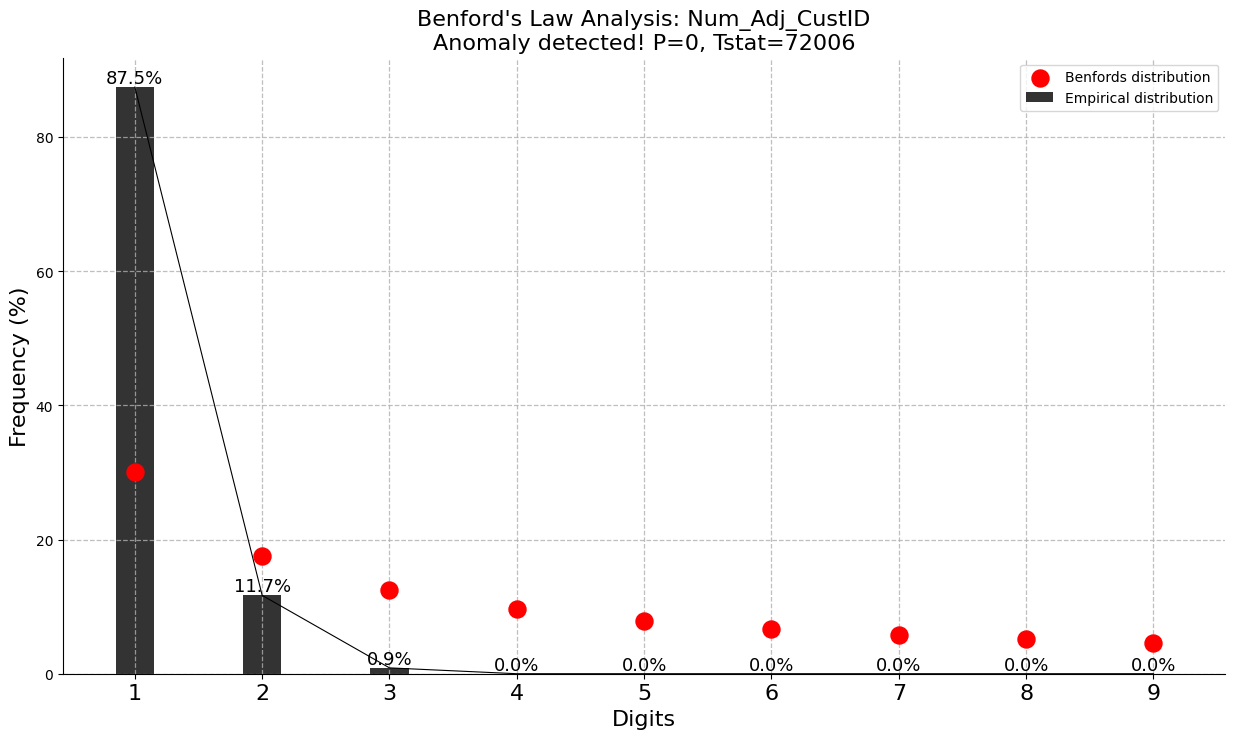

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=14815


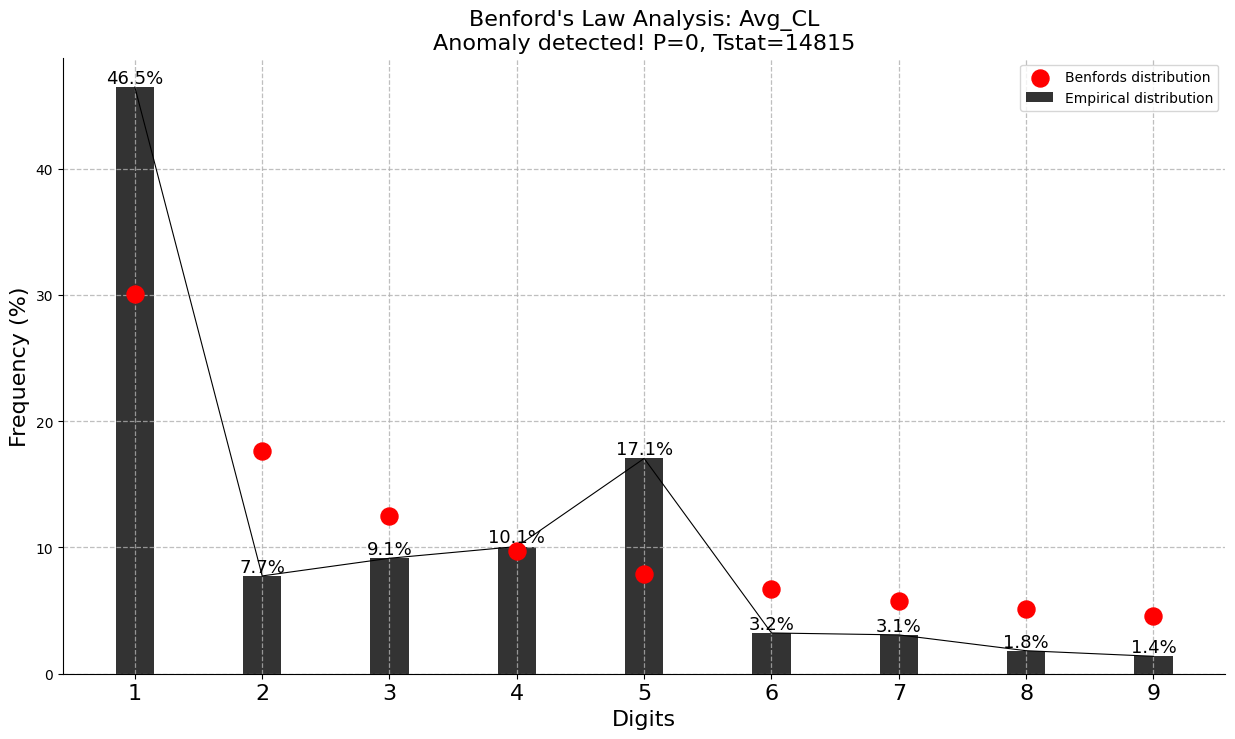

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=2241.18


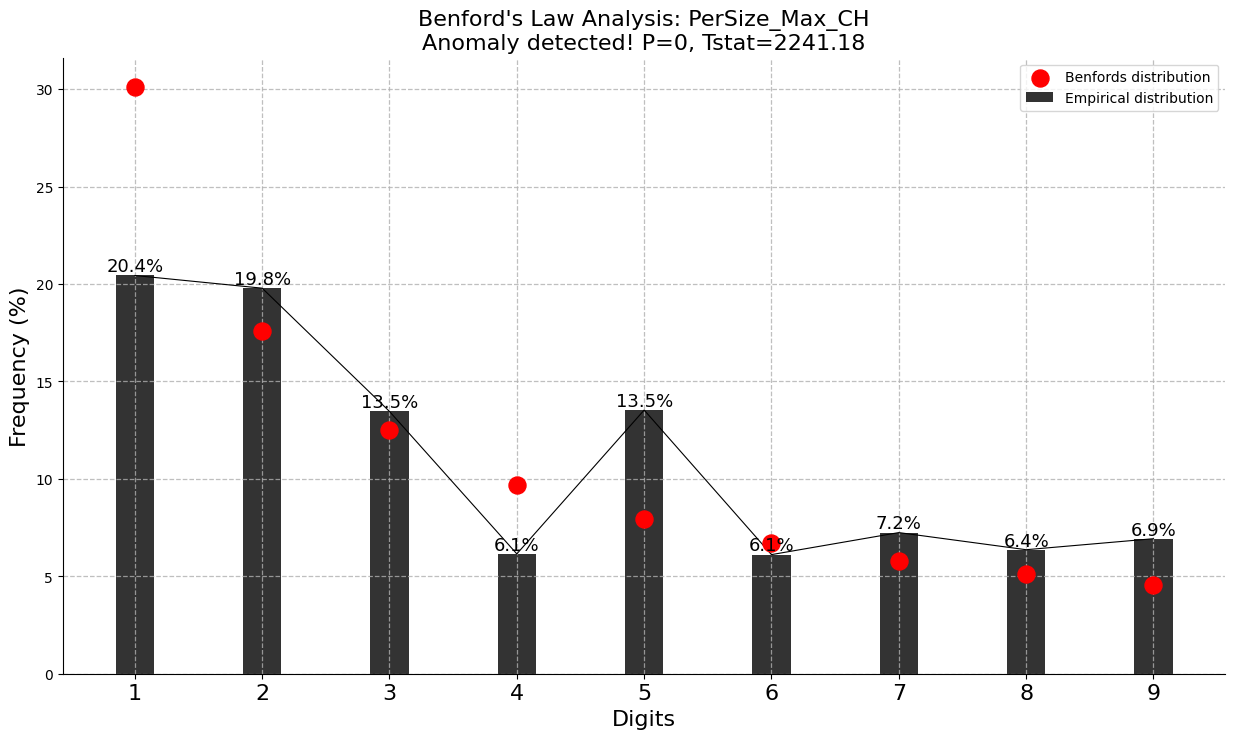

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=7.59323e-108, Tstat=523.144


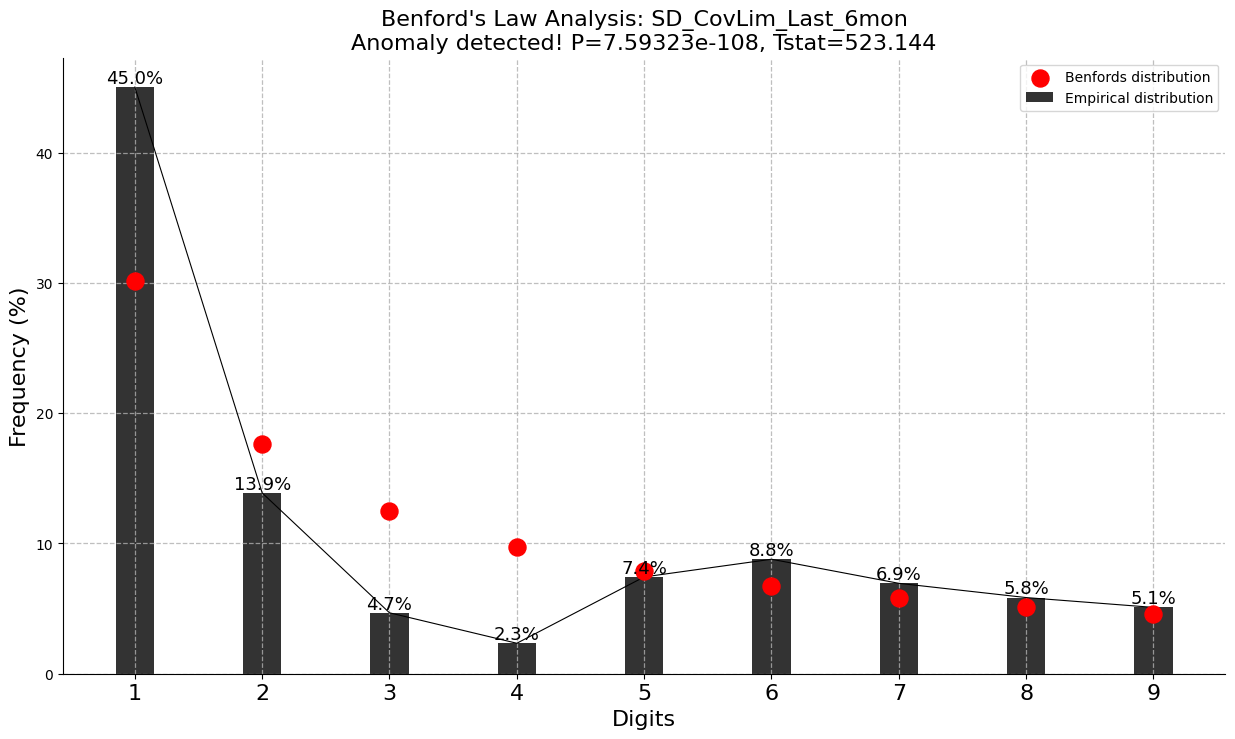

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=12085.6


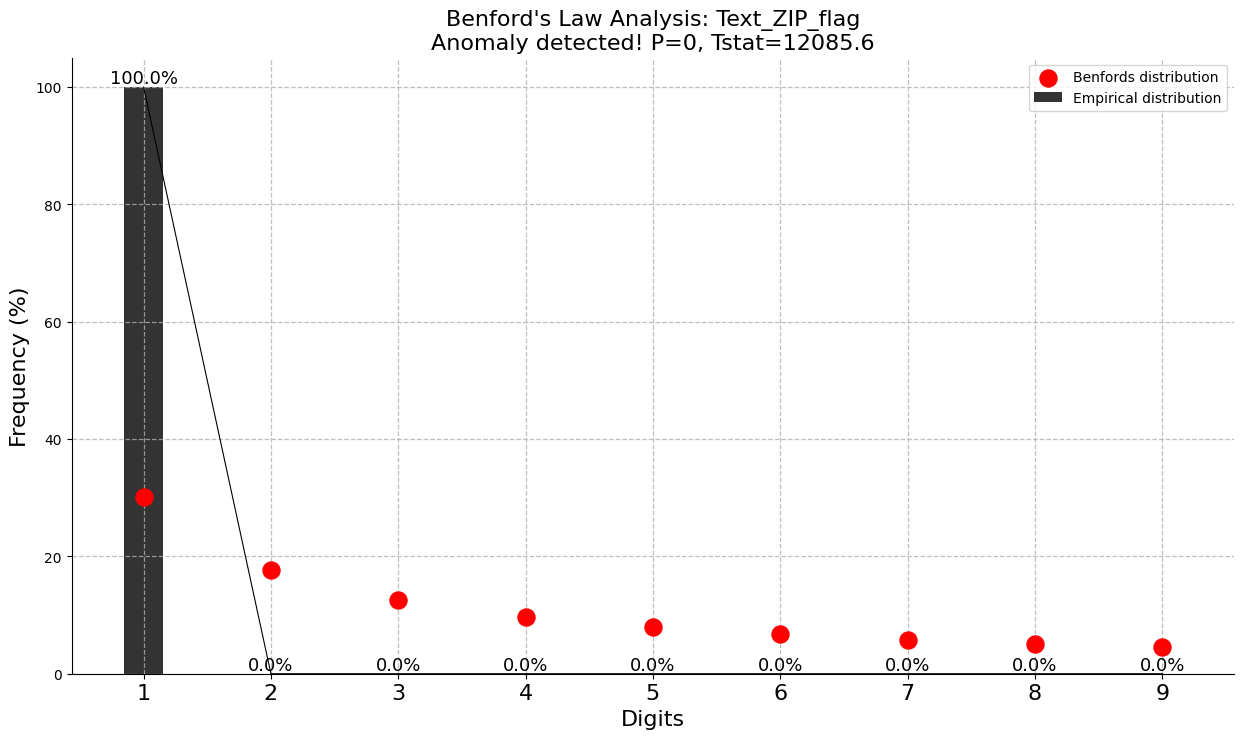

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=14927.7


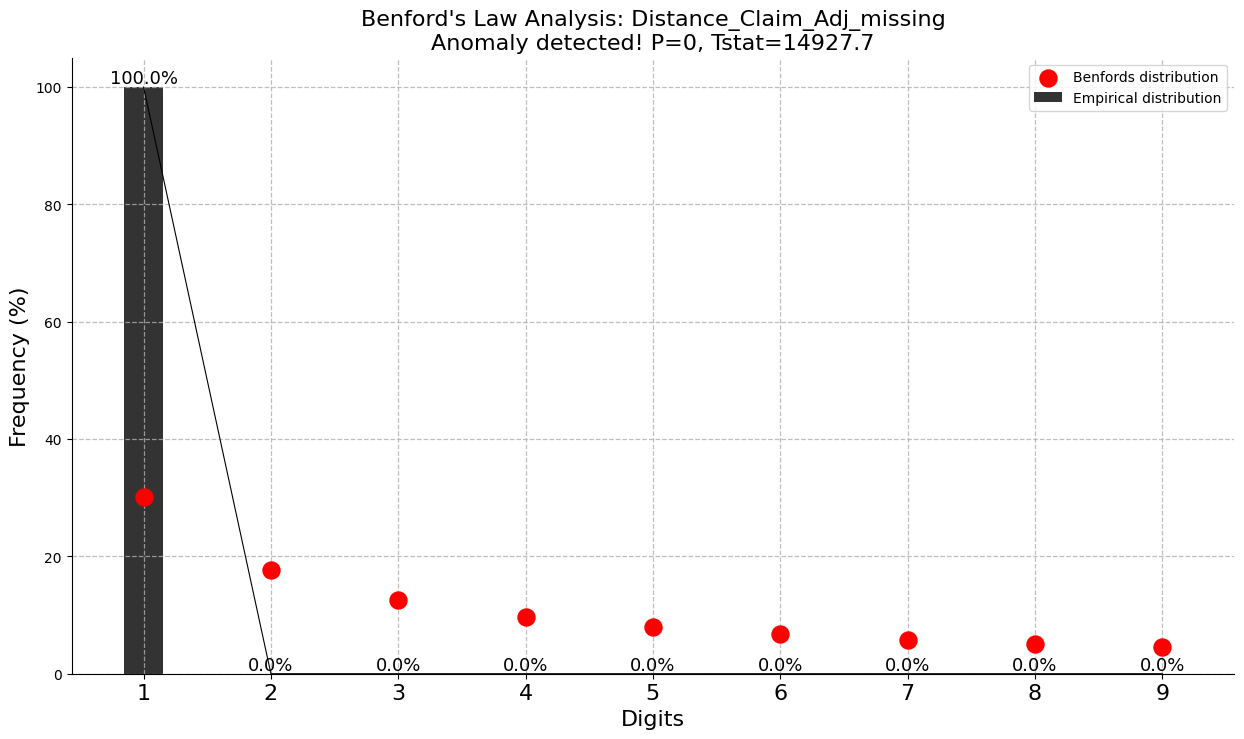

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=4191.08


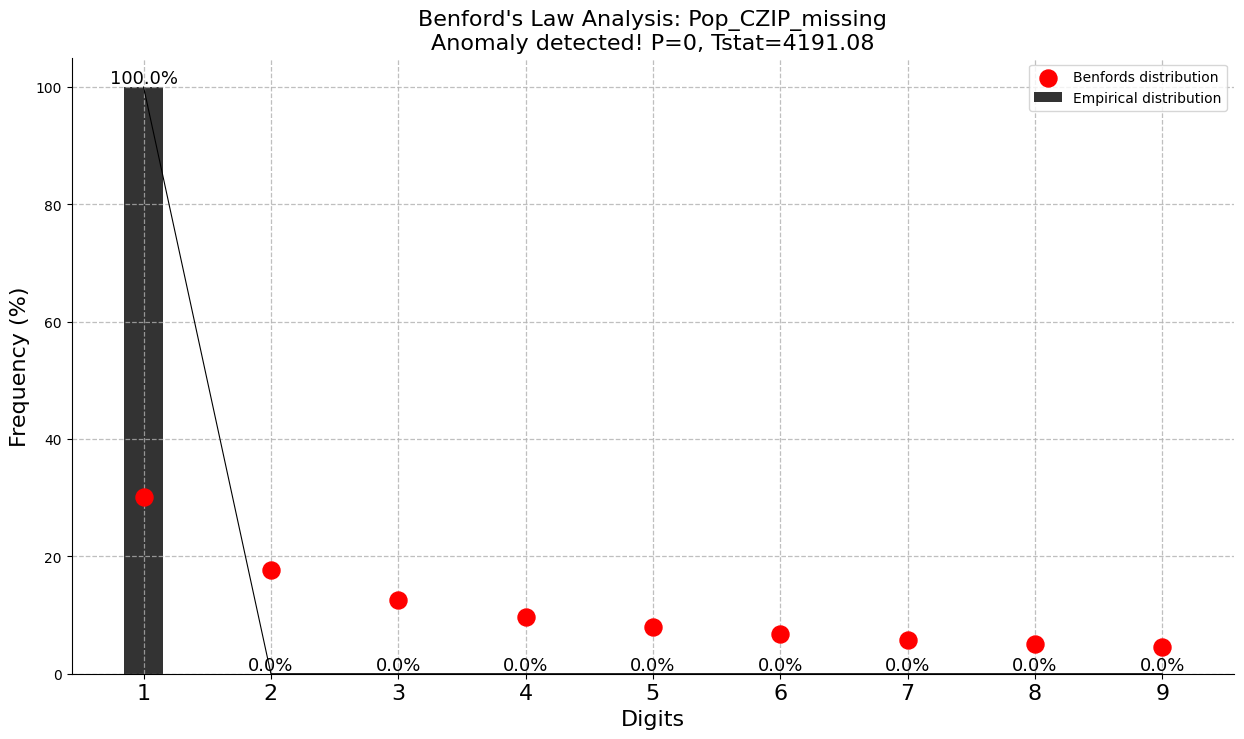

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=5140.75


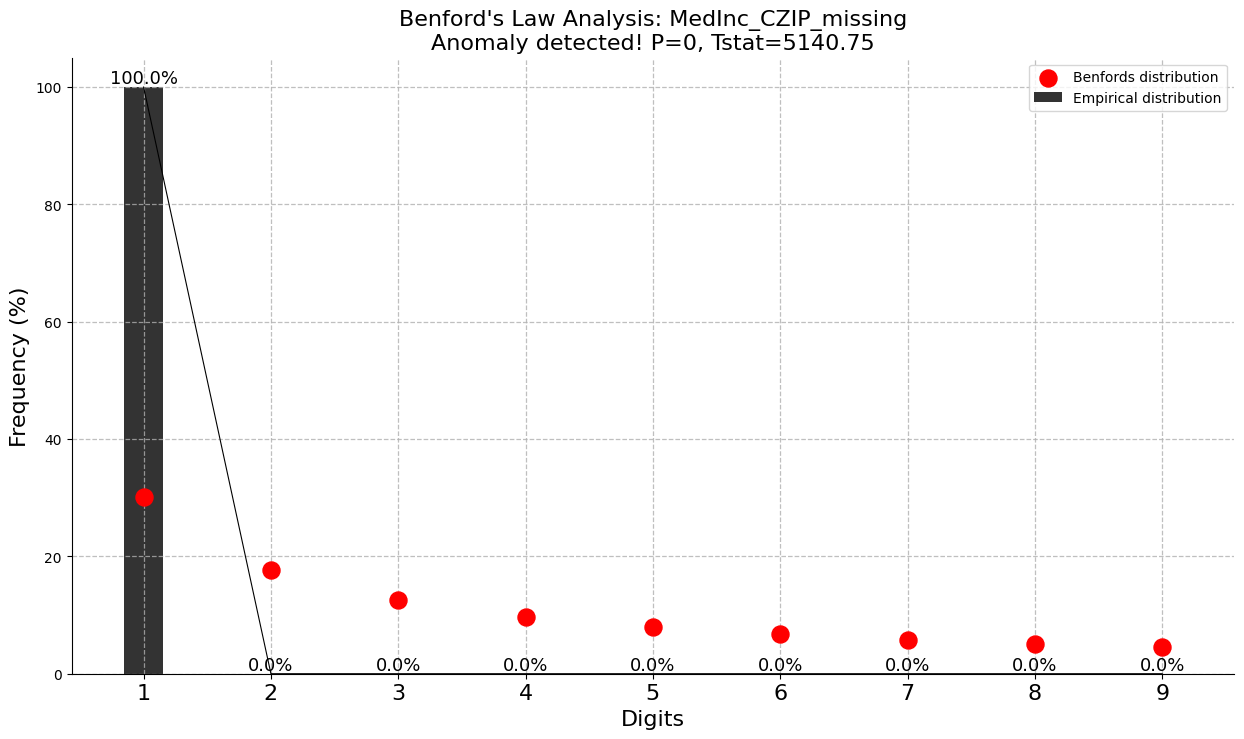

In [137]:
from benfordslaw import benfordslaw

# Initialize Benford's Law analyzer
bl = benfordslaw(alpha=0.05)
results = {}

# Analyze each numeric column
for col in fraud.select_dtypes(include='number').columns:
    # Get positive values only
    valid_data = fraud[col][fraud[col] > 0].dropna()
    
    # Skip columns with insufficient data
    if len(set(valid_data)) < 100 | len(valid_data) < 100:
        continue
        
    # Run Benford's analysis
    results[col] = bl.fit(valid_data)
    
    bl.plot(title=f"Benford's Law Analysis: {col}")

In [138]:
# fraud['benfords_flag'] = np.where(
#     (fraud['Cov_Limit_Claim'].astype(str).str[0] == '5') |
#     (fraud['Initial_to_Claim_Difference_CL'].astype(str).str[0] == '5') |
#     (fraud['Avg_CL'].astype(str).str[0] == '5'), 
#     1,
#     0
# )

# fraud[fraud['benfords_flag'] == 1].shape

### Z-Scores and Robust Z-scores

### Classifier-Adjusted Density Estimation (CADE)

# LOF

In [139]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [143]:
scaler = StandardScaler()
fraud_scaled = scaler.fit_transform(fraud.select_dtypes(include=np.number))

lof = LocalOutlierFactor(n_neighbors=5, novelty=False)
lof.fit(fraud_scaled)

lof_scores = lof.negative_outlier_factor_

fraud['lof_score'] = lof_scores

In [144]:
fraud.sort_values(by='lof_score')


GivenName MiddleInitial    Surname              StreetAddress  \
25437     Jamie             M       Doty       2910 Red Maple Drive   
18110    Joseph             A     Harmon          3092 Wayside Lane   
22628       Tom             S     Romero             920 Alpaca Way   
44137     Kevin             F      Conde          3098 Water Street   
2610     Newton             H      Smith         3818 Vernon Street   
...         ...           ...        ...                        ...   
2855    Beverly             K  Scheuerma  3095 Black Oak Hollow Roa   
13774    Curtis             M        May       3928 Stratford Drive   
26191     Maria             S       Gray        451 Edgewood Avenue   
33688  Clarence             B    Shofner        3409 Southside Lane   
4518    Michael             S     Nelson            2294 Edsel Road   

               City State  ZipCode TelephoneNumber MothersMaiden   Birthday  \
25437      El Monte    CA    91731    323-509-6530       Shelton   1-Aug-46   
18110  Walnut Creek    CA    94597    510-227-6964      Delacruz  20-Aug-55   
22628       Anaheim    CA    92801    714-756-8204        Keenan  15-Mar-32   
44137       Oakland    CA    94607    925-352-7866          Luna   3-Feb-65   
2610     California    CA     2110    760-687-6412         Betts  12-Sep-29   
...             ...   ...      ...             ...           ...        ...   
2855        Oakland    CA    94612    408-715-8190       Spencer   7-Nov-27   
13774         Lihue    HI    96766    808-245-6515         Smith  17-Mar-30   
26191        Fresno    CA    93721    559-289-7427         Darcy  24-Sep-57   
33688    Wilmington    CA    90744    323-775-3482         Drake  12-Jun-32   
4518        Burbank    CA    91502    818-460-9079        Carter  16-Nov-40   

       ... Ratio_AdjZIP_PopZIP  Num_Adj_CustID   Avg_CL PerSize_Max_CH  \
25437  ...         0.002838701               1   875000      18.969100   
18110  ...         0.003106968               3   125000     100.000000   
22628  ...         0.001111684               2   375000      33.333333   
44137  ...         0.002322043               1   100000       0.000000   
2610   ...         0.001920216               1  2275000       1.017977   
...    ...                 ...             ...      ...            ...   
2855   ...         0.005946382               1   150000       0.000000   
13774  ...         0.004835524               1    50000       0.000000   
26191  ...         0.001650584               1   100000       0.000000   
33688  ...         0.001375081               1   100000       0.000000   
4518   ...         0.001832817               1   175000     100.000000   

      SD_CovLim_Last_6mon Text_ZIP_flag Distance_Claim_Adj_missing  \
25437                 0.0             0                          0   
18110                 0.0             0                          0   
22628                 0.0             0                          0   
44137                 0.0             0                          0   
2610             206250.0             0                          0   
...                   ...           ...                        ...   
2855                  0.0             0                          0   
13774                 0.0             0                          0   
26191                 0.0             0                          0   
33688                 0.0             0                          0   
4518                  0.0             0                          0   

       Pop_CZIP_missing  MedInc_CZIP_missing  lof_score  
25437                 0                    0 -21.391871  
18110                 0                    0 -12.383803  
22628                 0                    0 -12.382210  
44137                 0                    0  -3.671322  
2610                  0                    0  -2.941129  
...                 ...                  ...        ...  
2855                  0                    0  -0.927562  
13774     